In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] #0

In [3]:
import switch_metrics as sm

In [4]:
%matplotlib agg
sub_db =db.loc[['e13_26m1','e15_13f1','e15_10m1','e16_1f1']].sort_values('n_pyr_putative',ascending=False)
fail_l = []
spk_beh_df_all={}
cell_cols_d_all={}
fr_map_trial_df_d_all={}
# pf_res_all={}
pf_all_field_combined_all = {}
# switch_res_all={}
X_raw_all = {}
X_pwc_all = {}
changes_df_combined_all = {}
all_sw_info_all = {}

trial_index_to_index_within_trialtype_all = {}

for ii,((ani,ii),row) in enumerate(sub_db.iterrows()):
    ddf = row['data_dir_full']
    key = (ani,row['sess_name'])
    try: 
        switch_res = saos.switch_analysis_one_session(ddf,place_field_res=None,force_reload=False,nrepeats=1000,
                                              save_fn=saos.SAVE_FN(saos.FR_KEY),load_only=True)
        plt.close()
        X_raw_all[key]=switch_res['avg']['X']['raw']
        X_pwc_all[key]=switch_res['avg']['X'][0.3]
        res = sm.add_switch_metrics_wrapper(ddf,
                                dosave=True, save_dir='switch_analysis',save_fn='all_switch_info.p',
                                force_reload=False,
                                load_only=True)
        plt.close()
        spk_beh_df_all[key]=res['spk_beh_df']
        trial_index_to_index_within_trialtype_all[key]= dpp.trial_index_to_index_within_trialtype(spk_beh_df_all[key])
        cell_cols_d_all[key]=res['cell_cols_d']
        fr_map_trial_df_d_all[key]=res['fr_map_trial_df_d']
        all_sw_info_all[key]=res['all_sw_info']
        pf_all_field_combined_all[key] = res['pf_all_field_combined']
        changes_df_combined_all[key] = res['changes_df_combined']
        
        
#         pf_res_all[key]=pf_res
#         switch_res_all[key]=switch_res
        
        
        
    except Exception as e:
        fail_l.append(key)
        print(f'{key} failed')
        print(e)

        
        
all_sw_info_all = pd.concat(all_sw_info_all,axis=0)
pf_all_field_combined_all = pd.concat(pf_all_field_combined_all,axis=0)


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_switch_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_switch_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/all_switch_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13

In [245]:
reload(ph)
reload(sm)

<module 'switch_metrics' from '/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py'>

In [250]:
# %%time
# edges = [0,6.8,20,33.6,42,50.5,67,84,100]
# count_df = all_sw.loc[all_sw['switch']==1] 
# count_df_pos =count_df['field_pos']
# all_fields_pos = all_fields['peak']
# edges = np.array([0,6.8,20,33.6,42,50.5,67,84,100])
# # frac_sample_all, edges = bootstrap_switch_spatial_distribution_one(count_df_pos,all_fields_pos,edges,nrepeats=10000)


# # count_df_pos = np.ones_like(count_df_pos)*15
# # count_df_pos[1:100] = 50
# # count_df_pos = pd.Series(count_df_pos)
# sw_count_sample_all,baseline_count_sample_all,edges,frac_sample_all = sm.bootstrap_switch_spatial_distribution_one(count_df_pos,all_fields_pos,edges,nrepeats=1000,sample_baseline=True)



CPU times: user 1.19 s, sys: 343 µs, total: 1.19 s
Wall time: 1.19 s


CPU times: user 225 ms, sys: 46.9 ms, total: 272 ms
Wall time: 169 ms


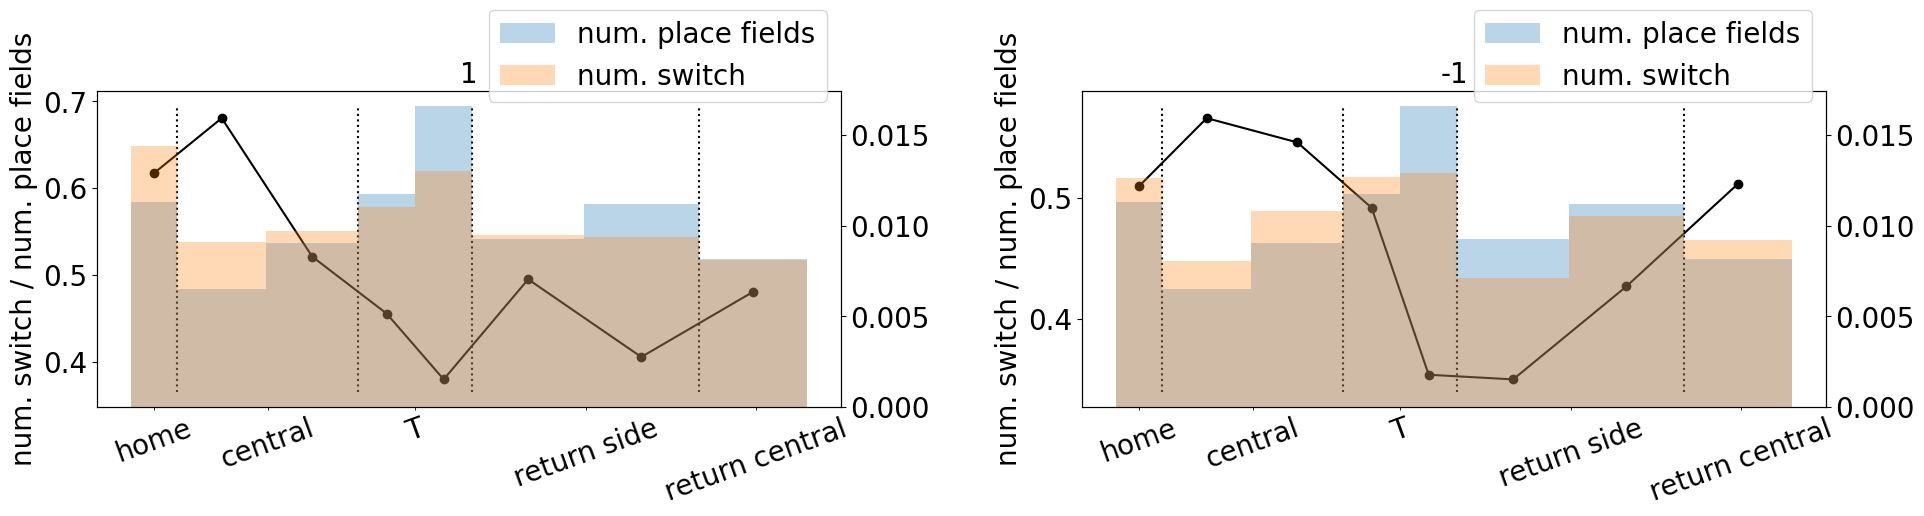

In [252]:
%%time
%matplotlib inline
reload(ph)
reload(sm)
all_sw = all_sw_info_all
all_fields = pf_all_field_combined_all
sw_count_per_pos_d, baseline_count, frac_per_pos_d, edges,fig,axs = sm.plot_switch_field_ratio(all_sw,all_fields,
                                                                                            n_bootstrap_repeats=None,
                                                                                            doplot=True)




In [264]:
gpb = all_sw_info_all.groupby(level=(0,1))

In [265]:
all_sw_info_all

trialtype  uid  field_index          time  \
e13_26m1 e13_26m1_210913 0       both   29            1   7893.902900   
                         1       both  140            0   7893.386117   
                         2       both  455            0   7893.252750   
                         3       both  168            0   7918.842533   
                         4       both  386            1   7918.492467   
...                               ...  ...          ...           ...   
e16_1f1  e16_1f1_200824  29         1   21            2  10720.237867   
                         30         1   32            0  10682.261633   
                         31         1   37            0  10867.691700   
                         32         1   35            1  10991.122833   
                         33         1    4            0  11108.285700   

                                     v  field_pos  trial_index  switch  \
e13_26m1 e13_26m1_210913 0   36.778932       21.0            1     1.0   
                         1    7.336045        9.0            1     1.0   
                         2    1.939159        7.0            1     1.0   
                         3   36.627722       23.0            2    -1.0   
                         4   29.929168       18.0            2     1.0   
...                                ...        ...          ...     ...   
e16_1f1  e16_1f1_200824  29  20.287605       68.0           16     1.0   
                         30   7.322853       42.0           16    -1.0   
                         31  15.028503       44.0           18     1.0   
                         32  25.158748       47.0           20     1.0   
                         33  36.383166       30.0           21     1.0   

                             index_within  switch_trial  ...  \
e13_26m1 e13_26m1_210913 0              0           1.0  ...   
                         1              0           1.0  ...   
                         2              0           1.0  ...   
                         3              1           2.0  ...   
                         4              1           2.0  ...   
...                                   ...           ...  ...   
e16_1f1  e16_1f1_200824  29            11          11.0  ...   
                         30            11          11.0  ...   
                         31            12          12.0  ...   
                         32            14          14.0  ...   
                         33            15          15.0  ...   

                             post_ntrial_le_10_perc_frac_total  \
e13_26m1 e13_26m1_210913 0                            0.000000   
                         1                            0.014286   
                         2                            0.585714   
                         3                            0.185714   
                         4                            0.528571   
...                                                        ...   
e16_1f1  e16_1f1_200824  29                           0.000000   
                         30                           0.000000   
                         31                           0.000000   
                         32                           0.000000   
                         33                           0.000000   

                             post_ntrial_le_30_perc_frac_total  \
e13_26m1 e13_26m1_210913 0                            0.000000   
                         1                            0.128571   
                         2                            0.771429   
                         3                            0.442857   
                         4                            0.842857   
...                                                        ...   
e16_1f1  e16_1f1_200824  29                           0.000000   
                         30                           0.000000   
                         31                           0.000000   
                         32             

In [272]:
all_sw_info_all.index.get_level_values(1).unique().shape

(23,)

# plot all spatial distribution

In [184]:
save_dir_root = "/mnt/home/szheng/ceph/place_variability/fig/general"

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


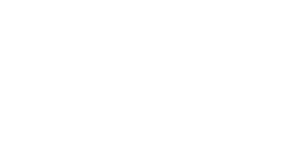

<IPython.core.display.Javascript object>


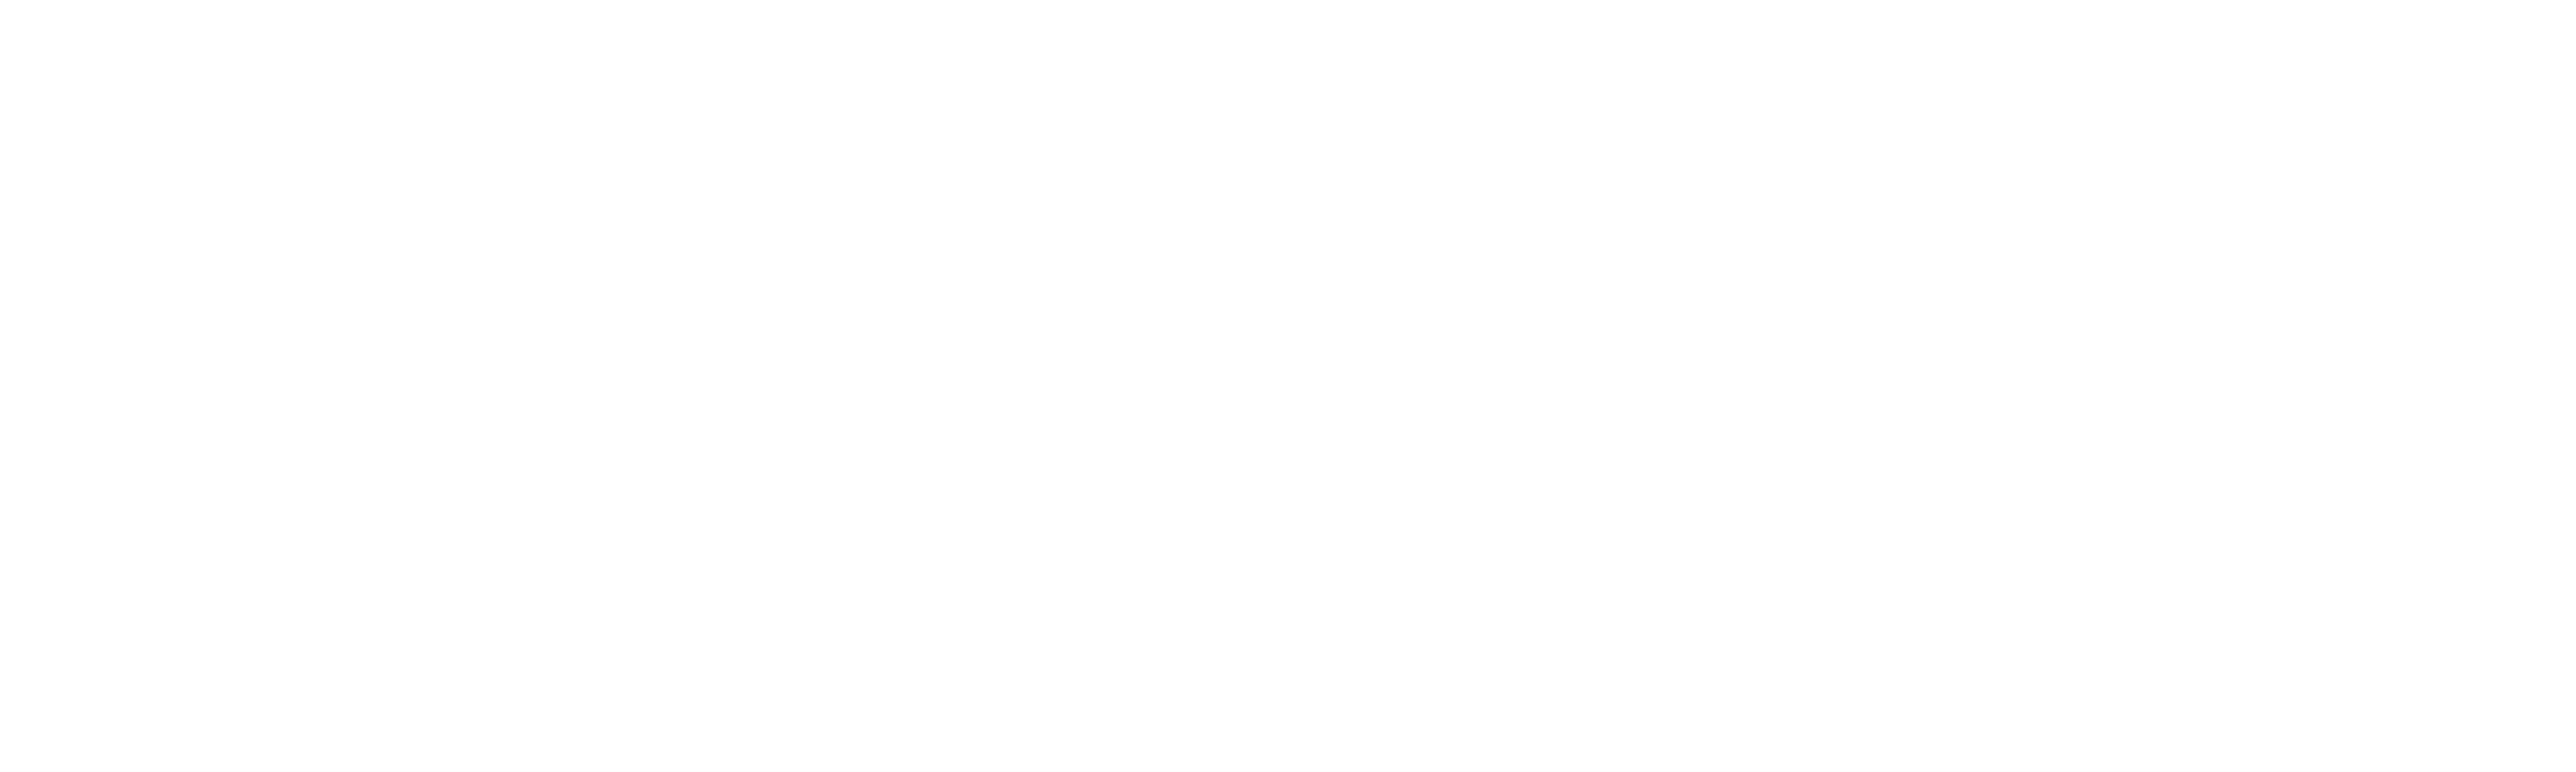

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


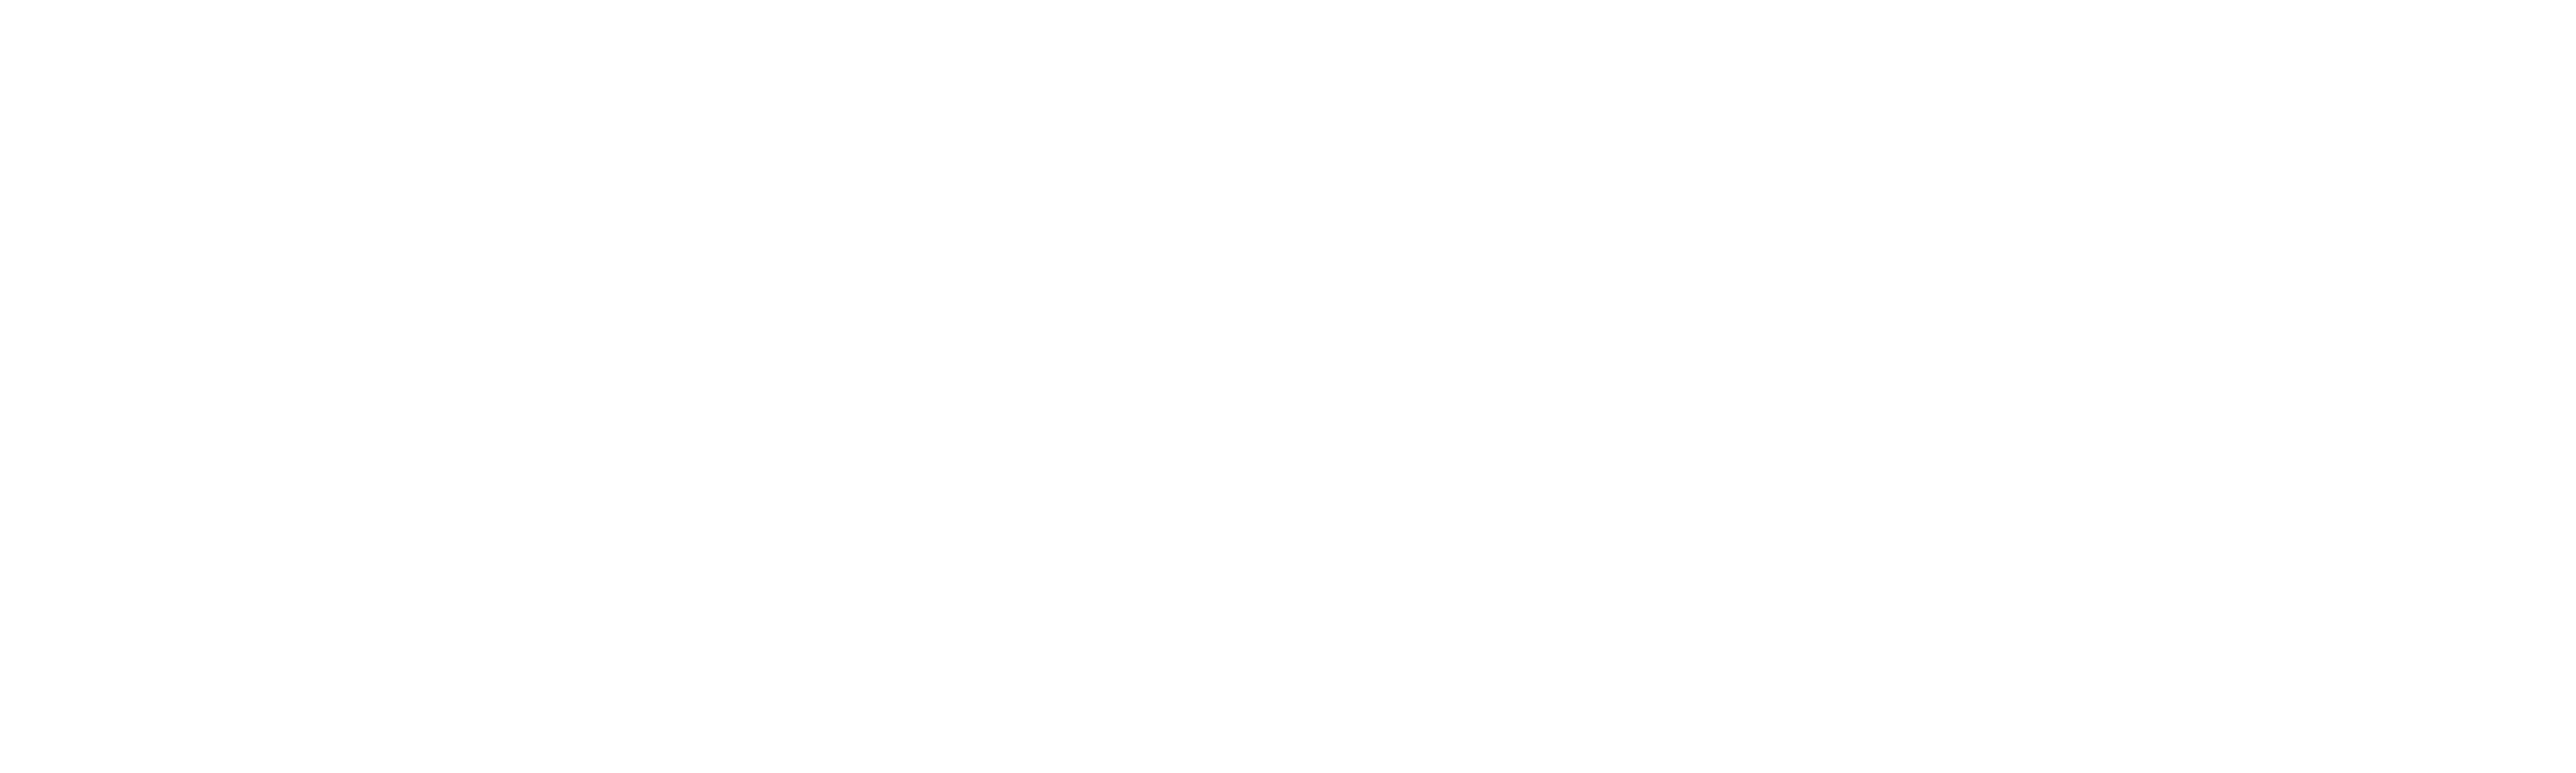

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1/e13_26m1_210913 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


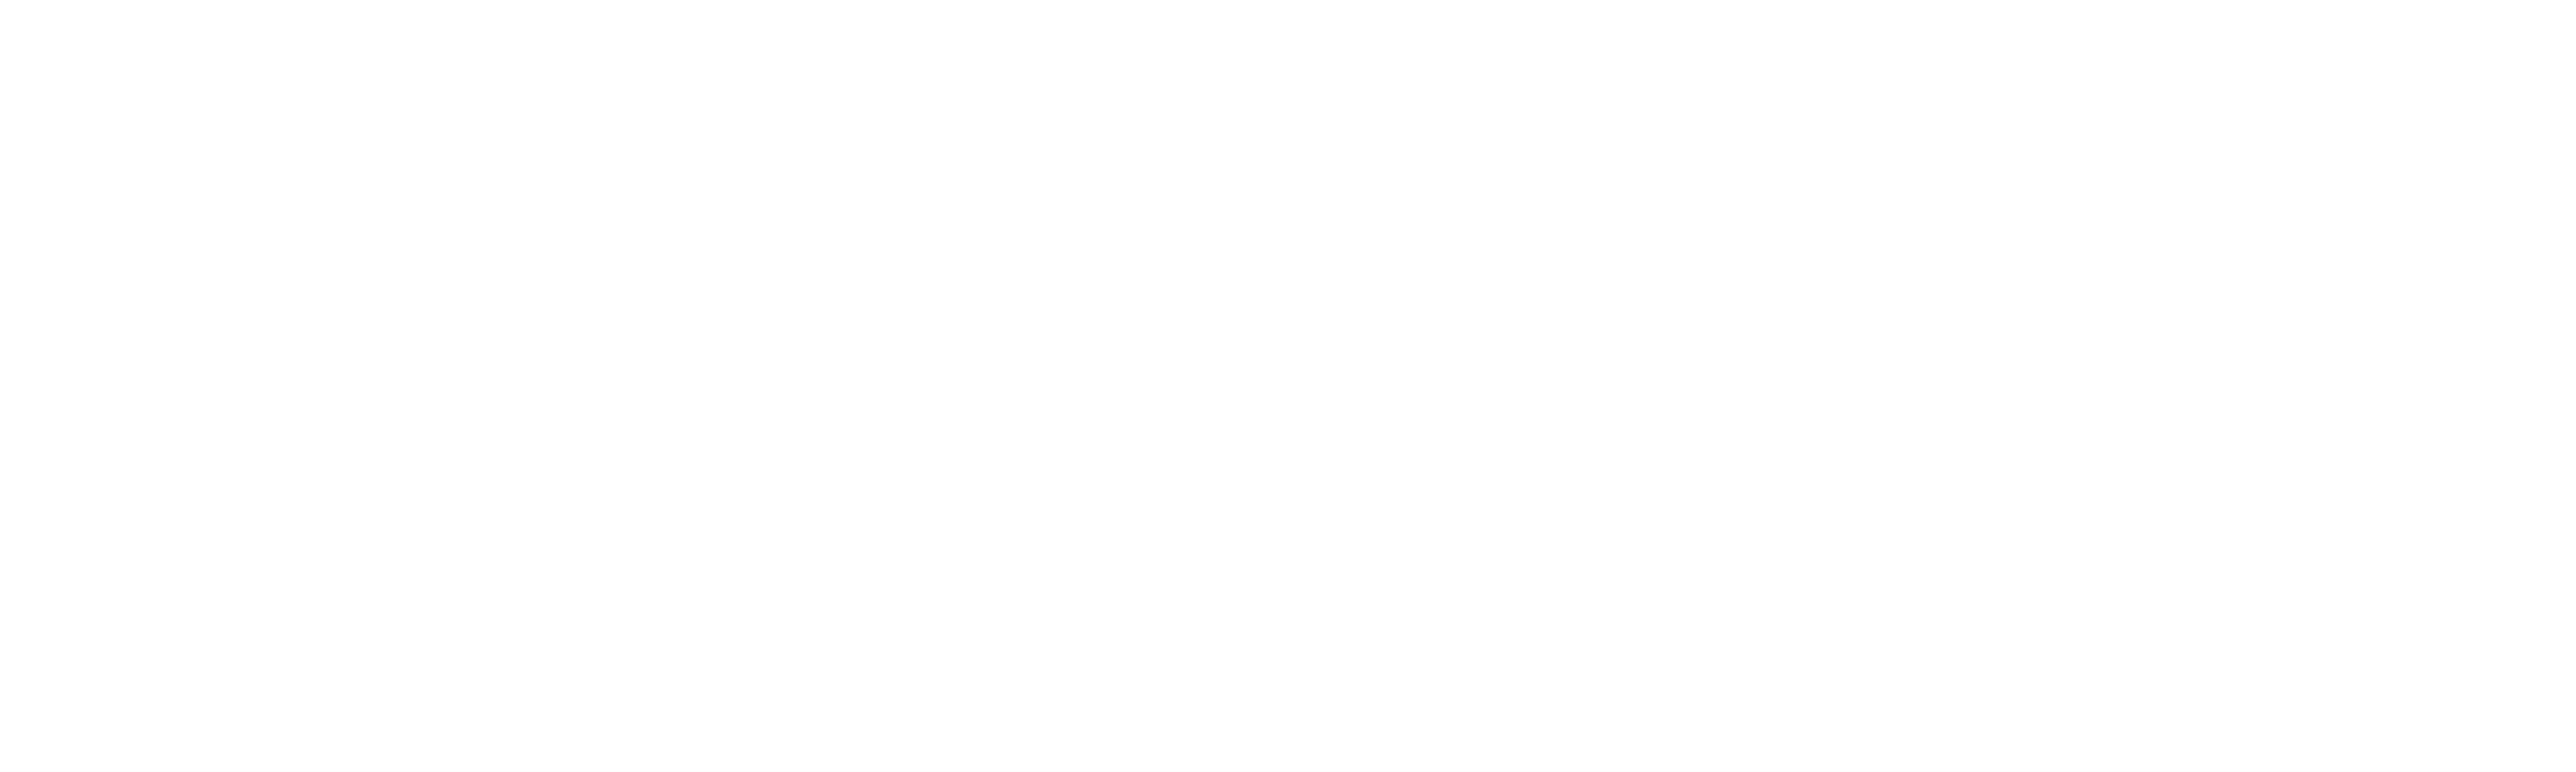

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1/e13_26m1_211019 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


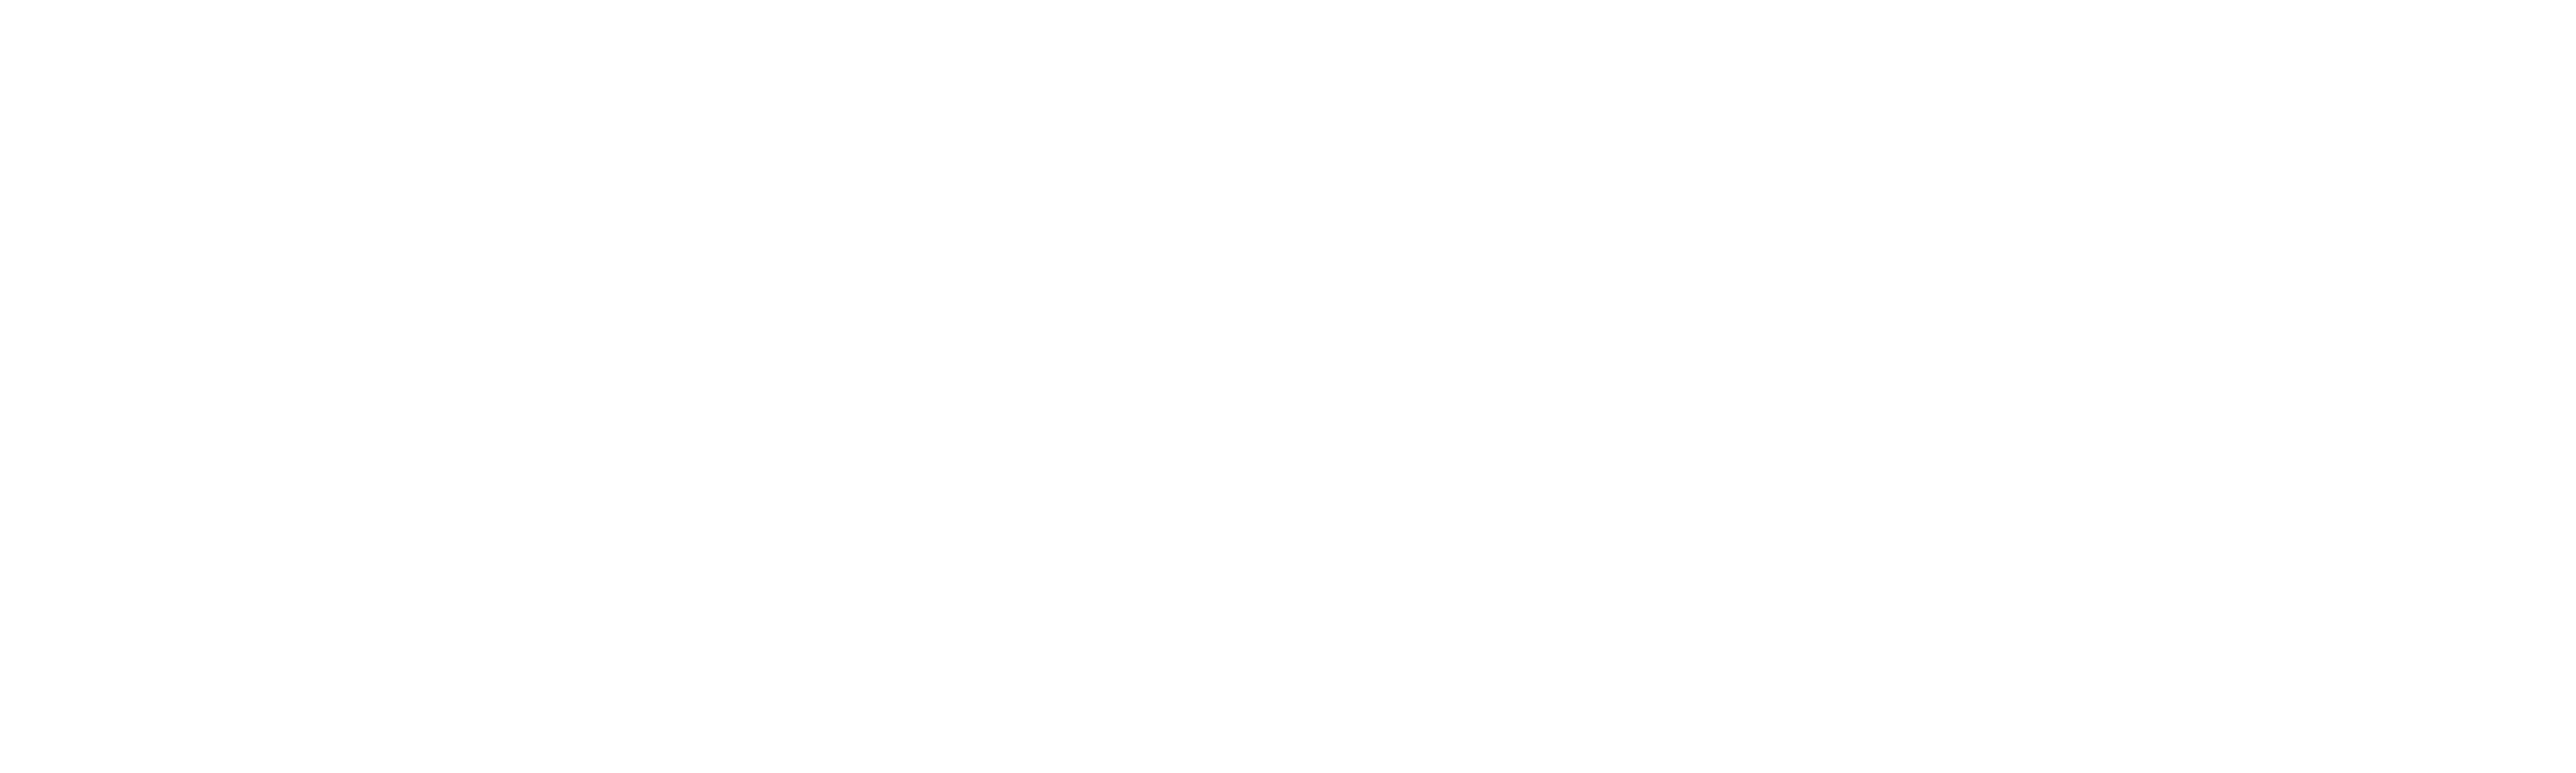

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1/e13_26m1_211116 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


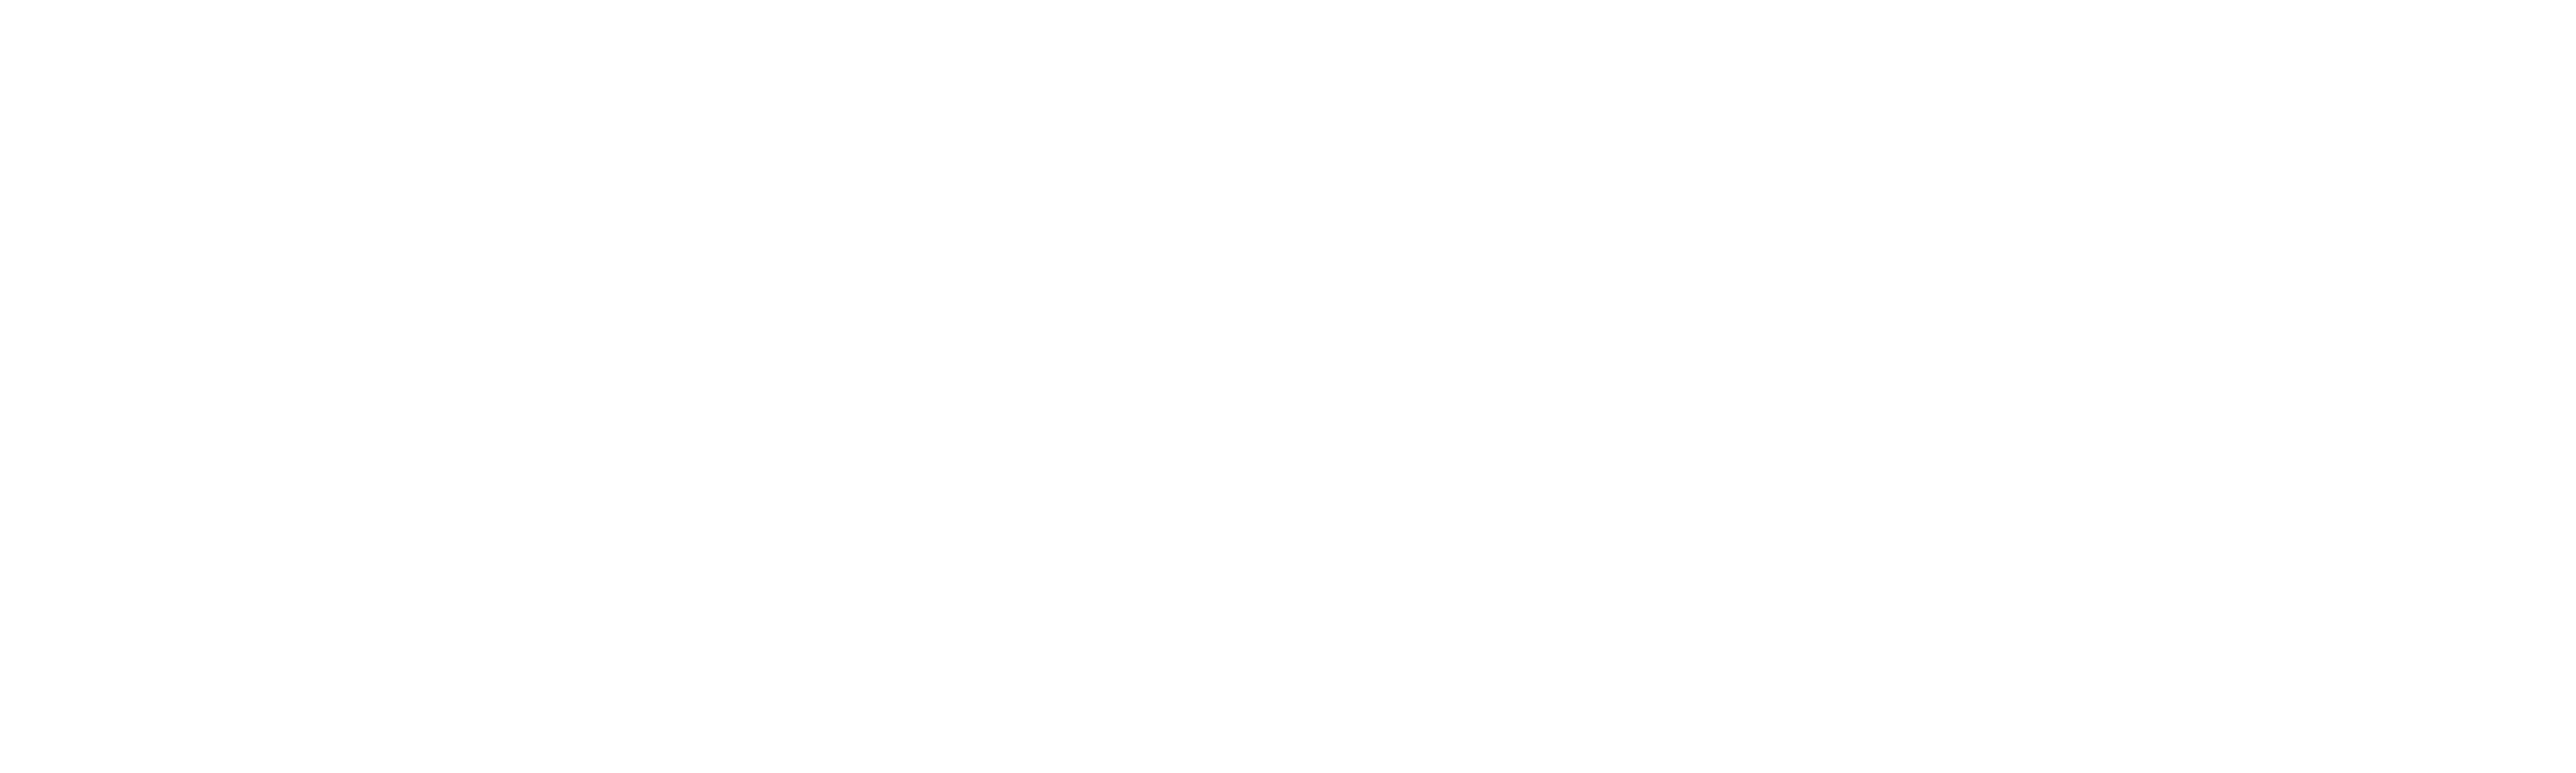

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1/e13_26m1_211119 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


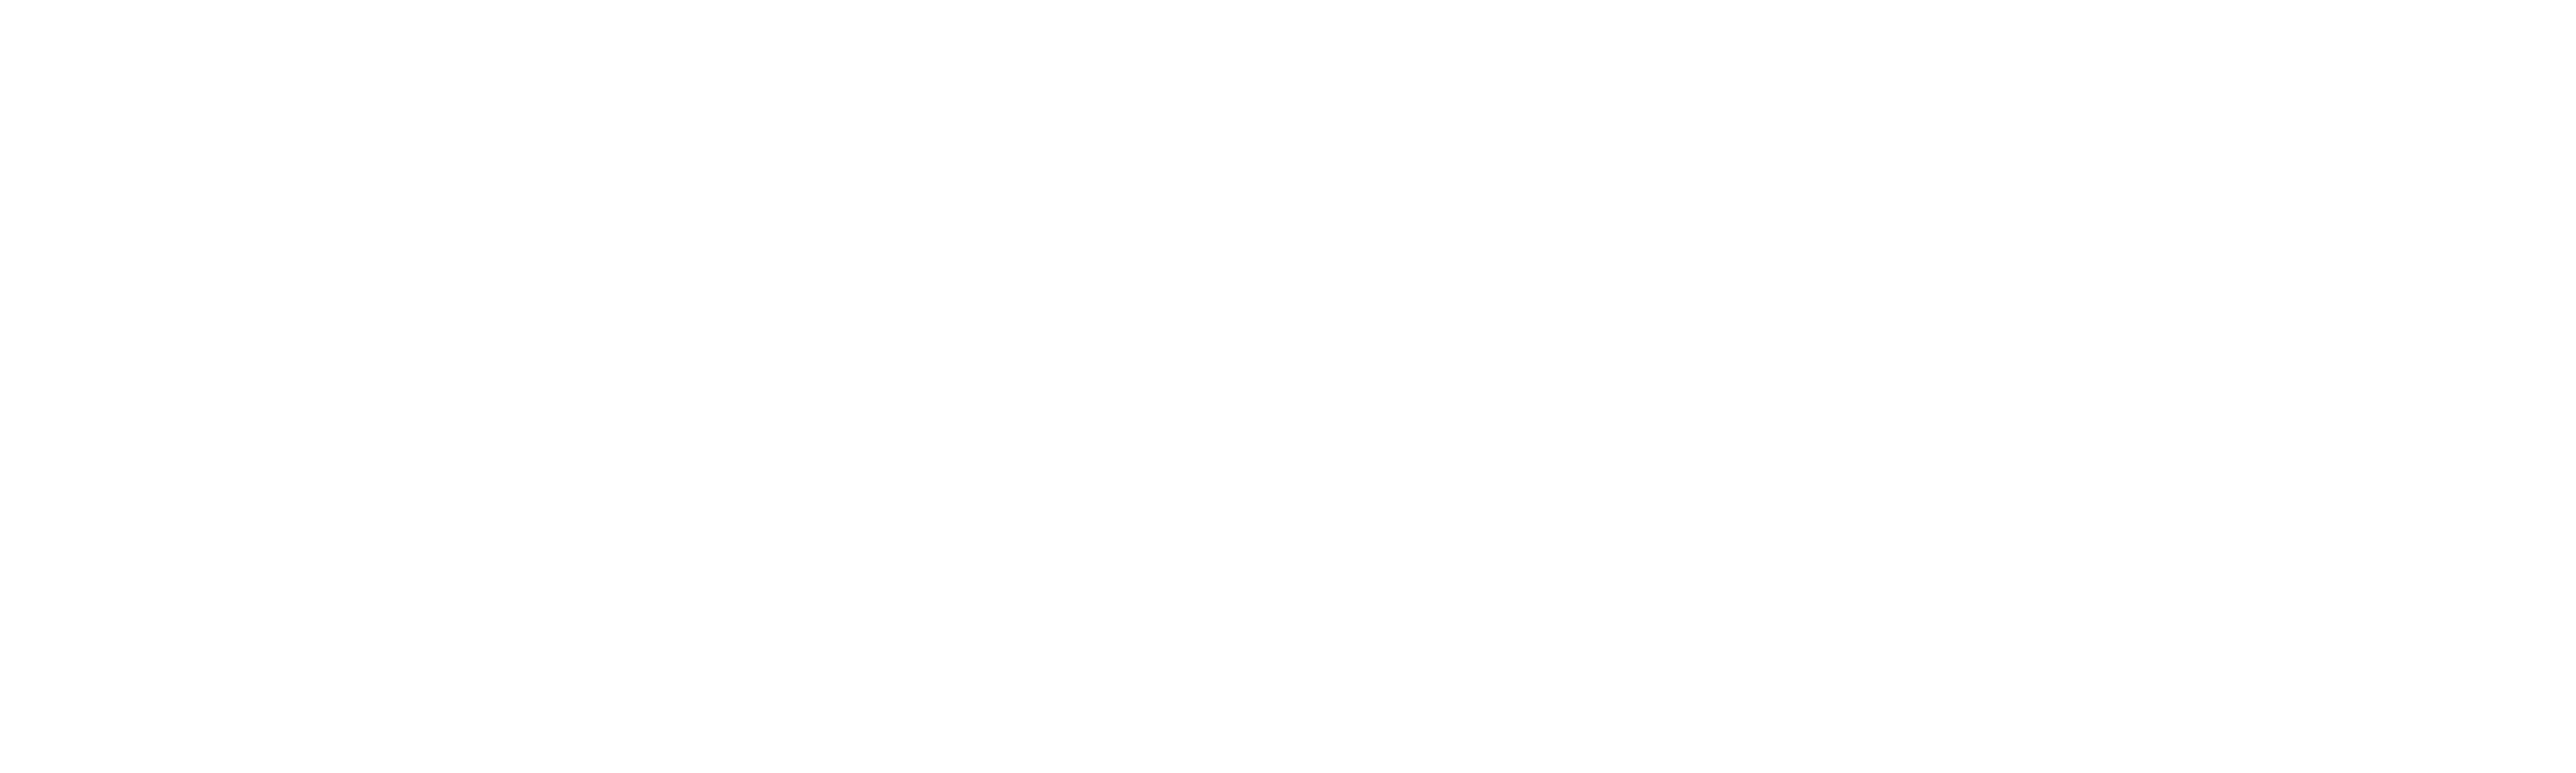

/mnt/home/szheng/ceph/place_variability/fig/general/e13_26m1/e13_26m1_211124 made!


<IPython.core.display.Javascript object>


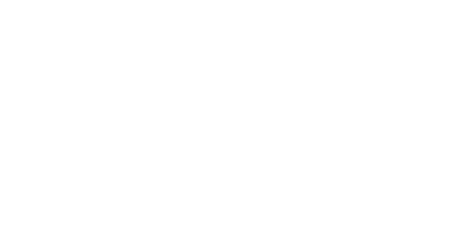

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


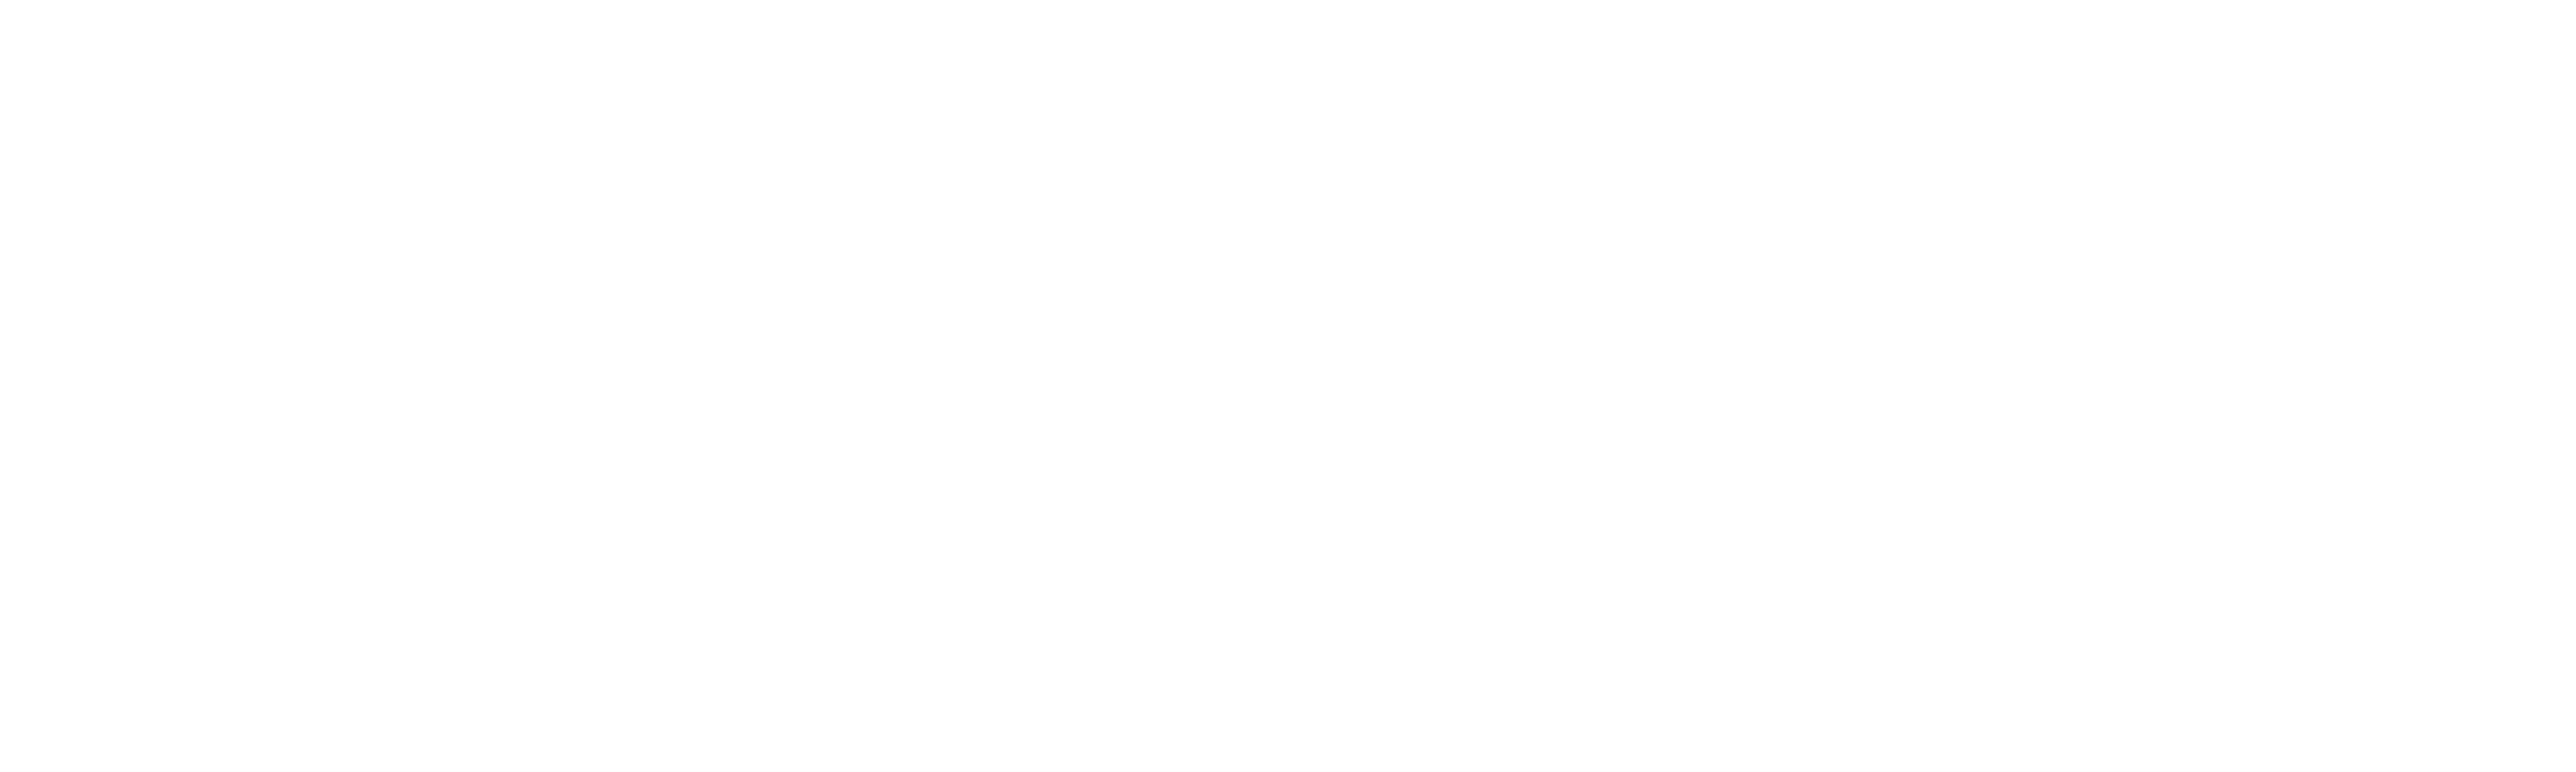

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1/e15_10m1_200716 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


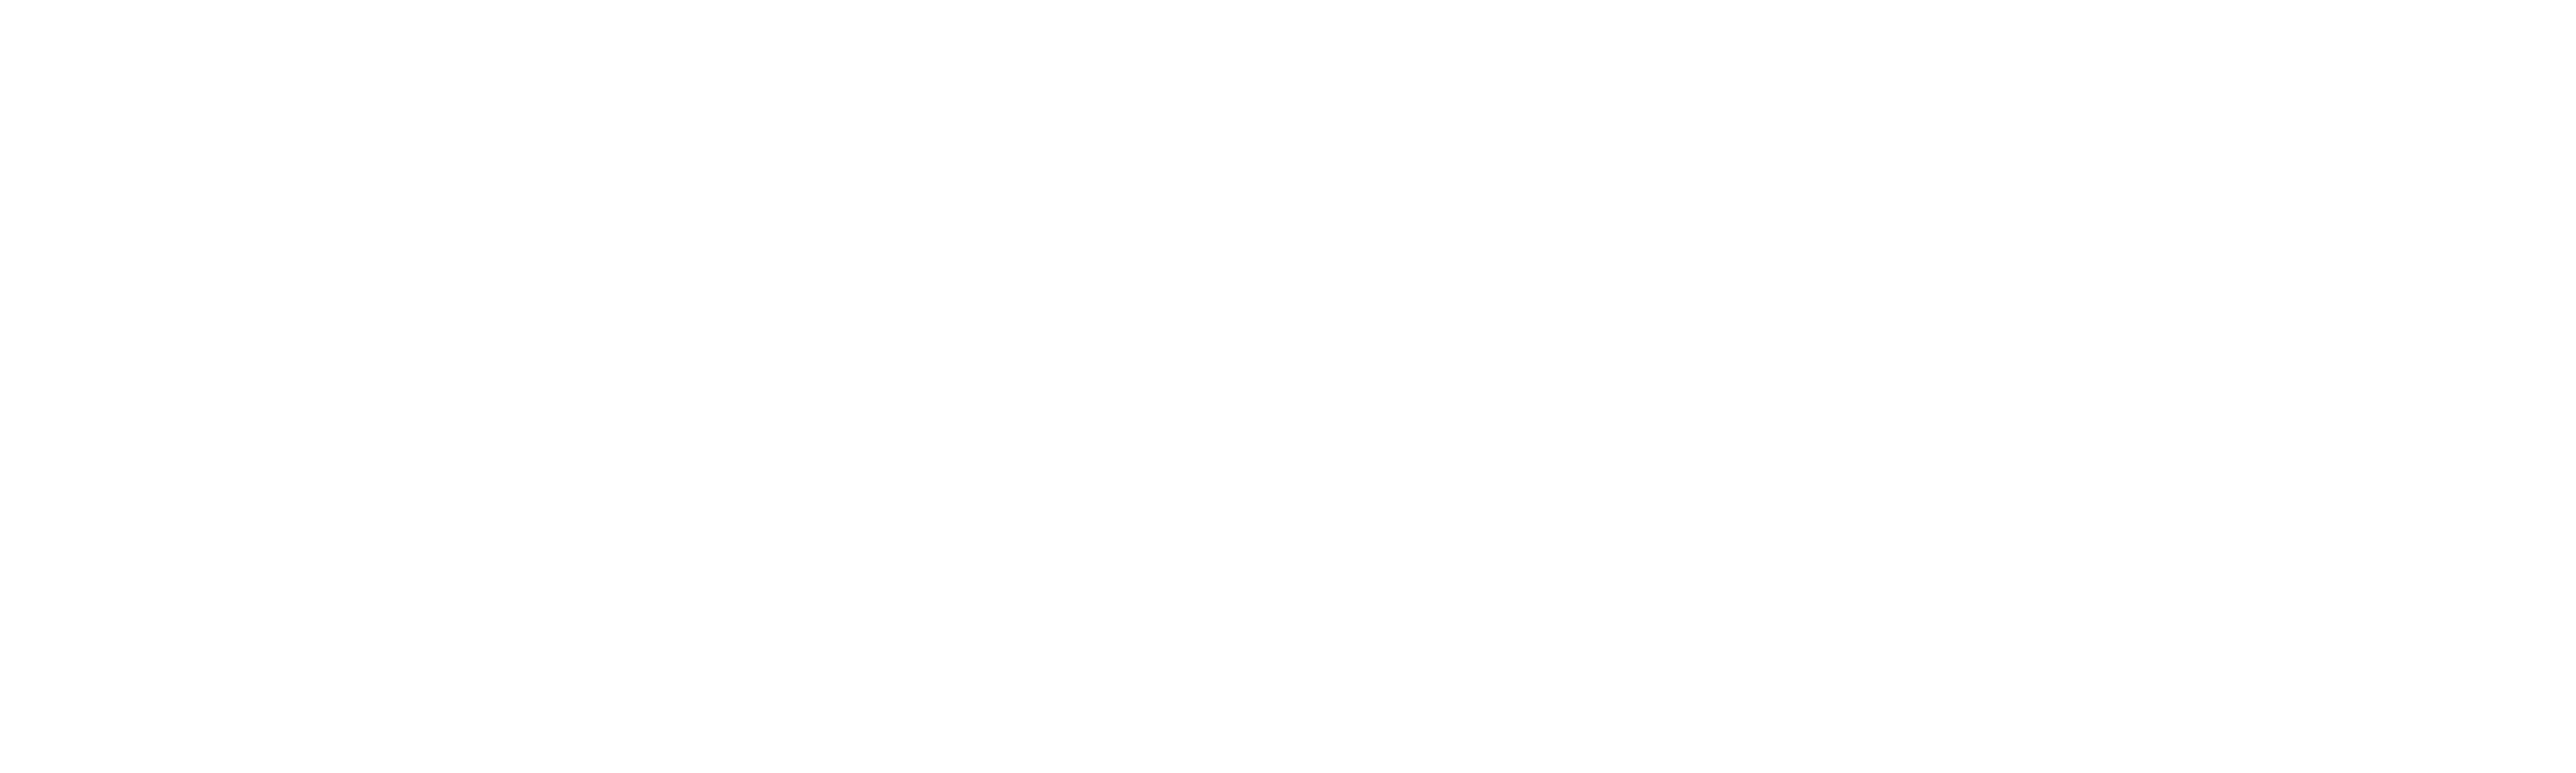

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1/e15_10m1_200719 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


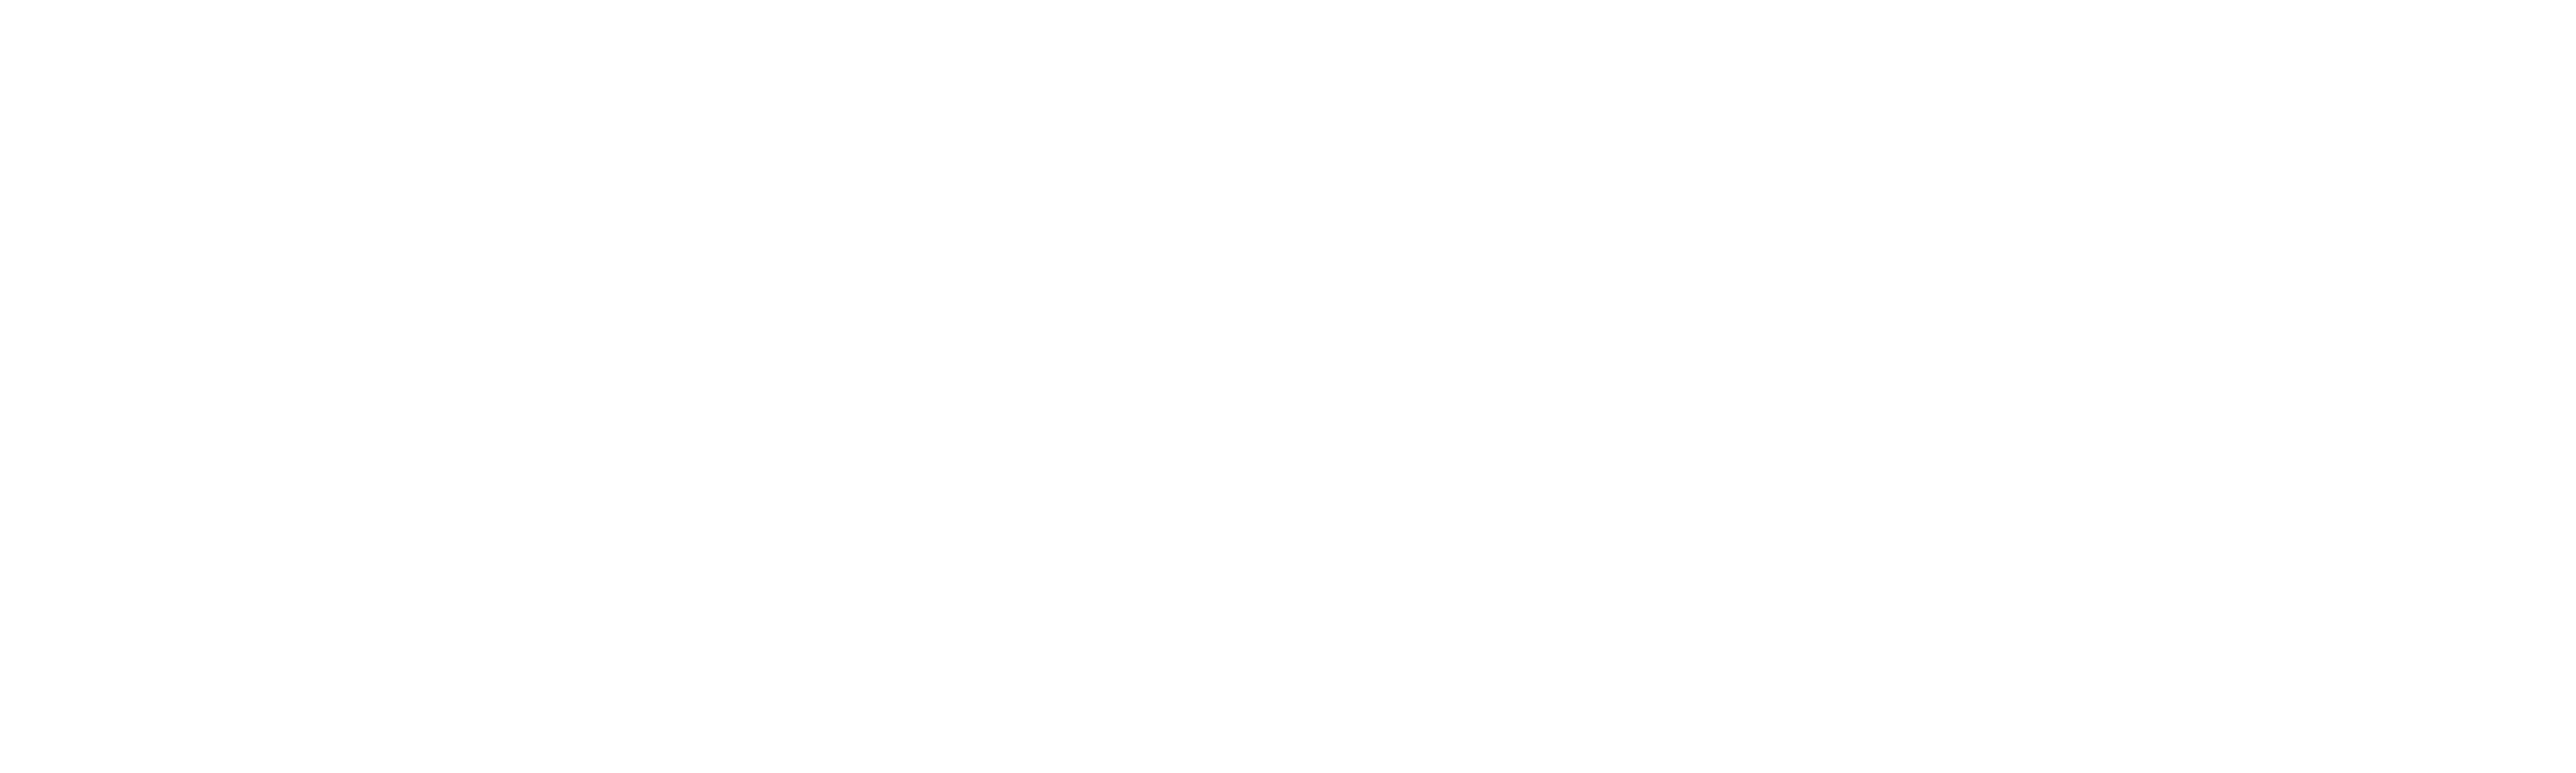

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1/e15_10m1_200723 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


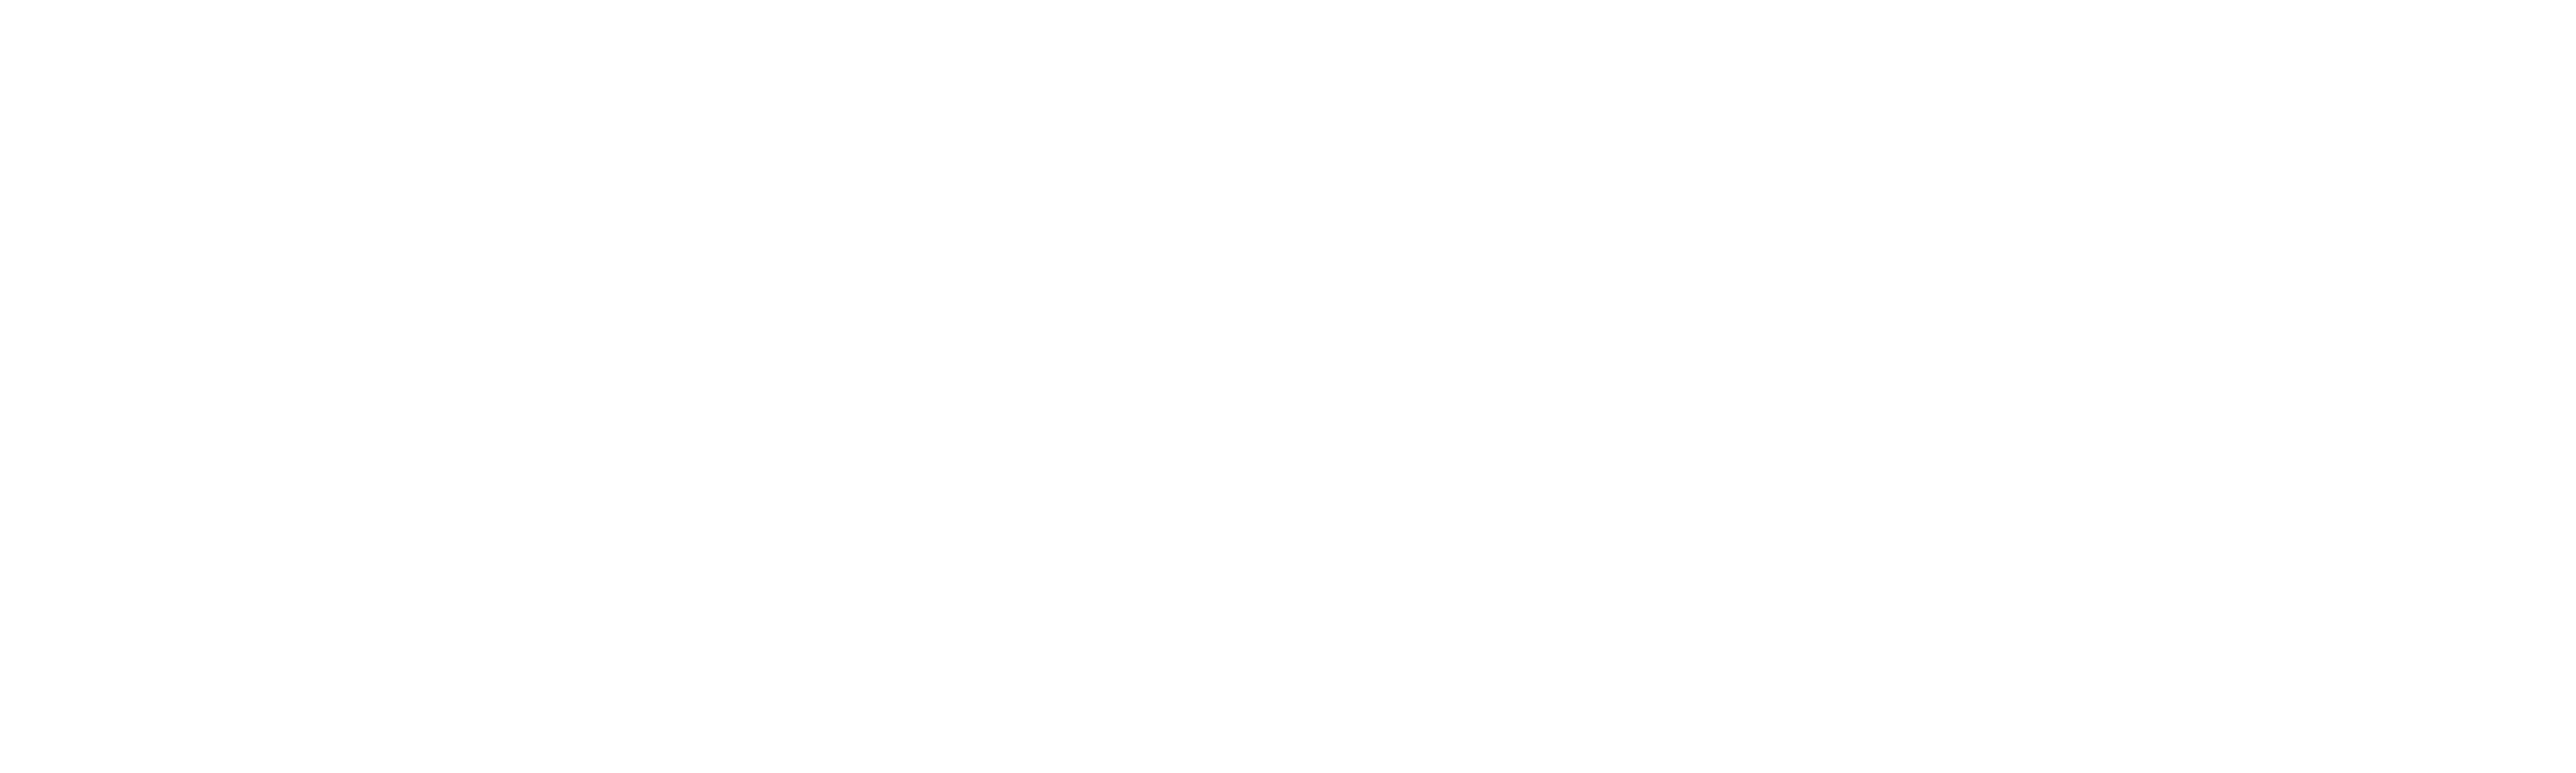

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1/e15_10m1_200809 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


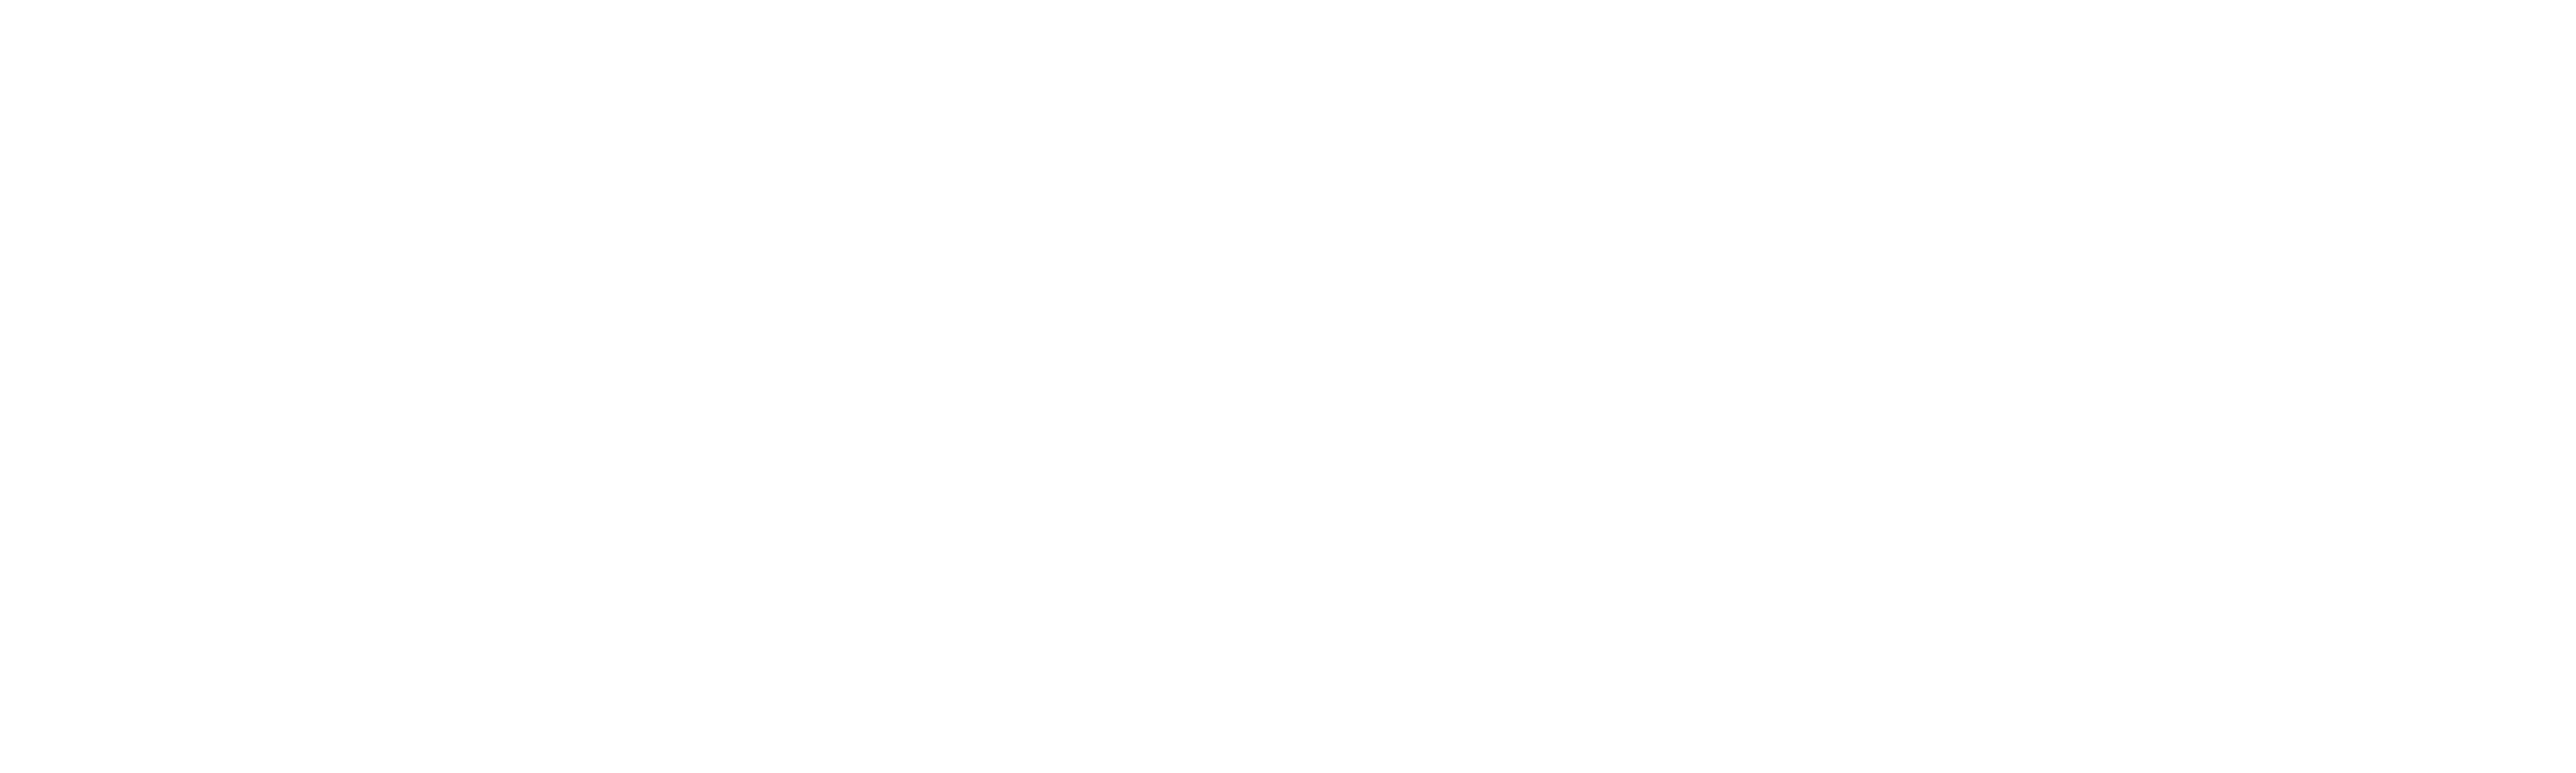

/mnt/home/szheng/ceph/place_variability/fig/general/e15_10m1/e15_10m1_200812 made!


<IPython.core.display.Javascript object>


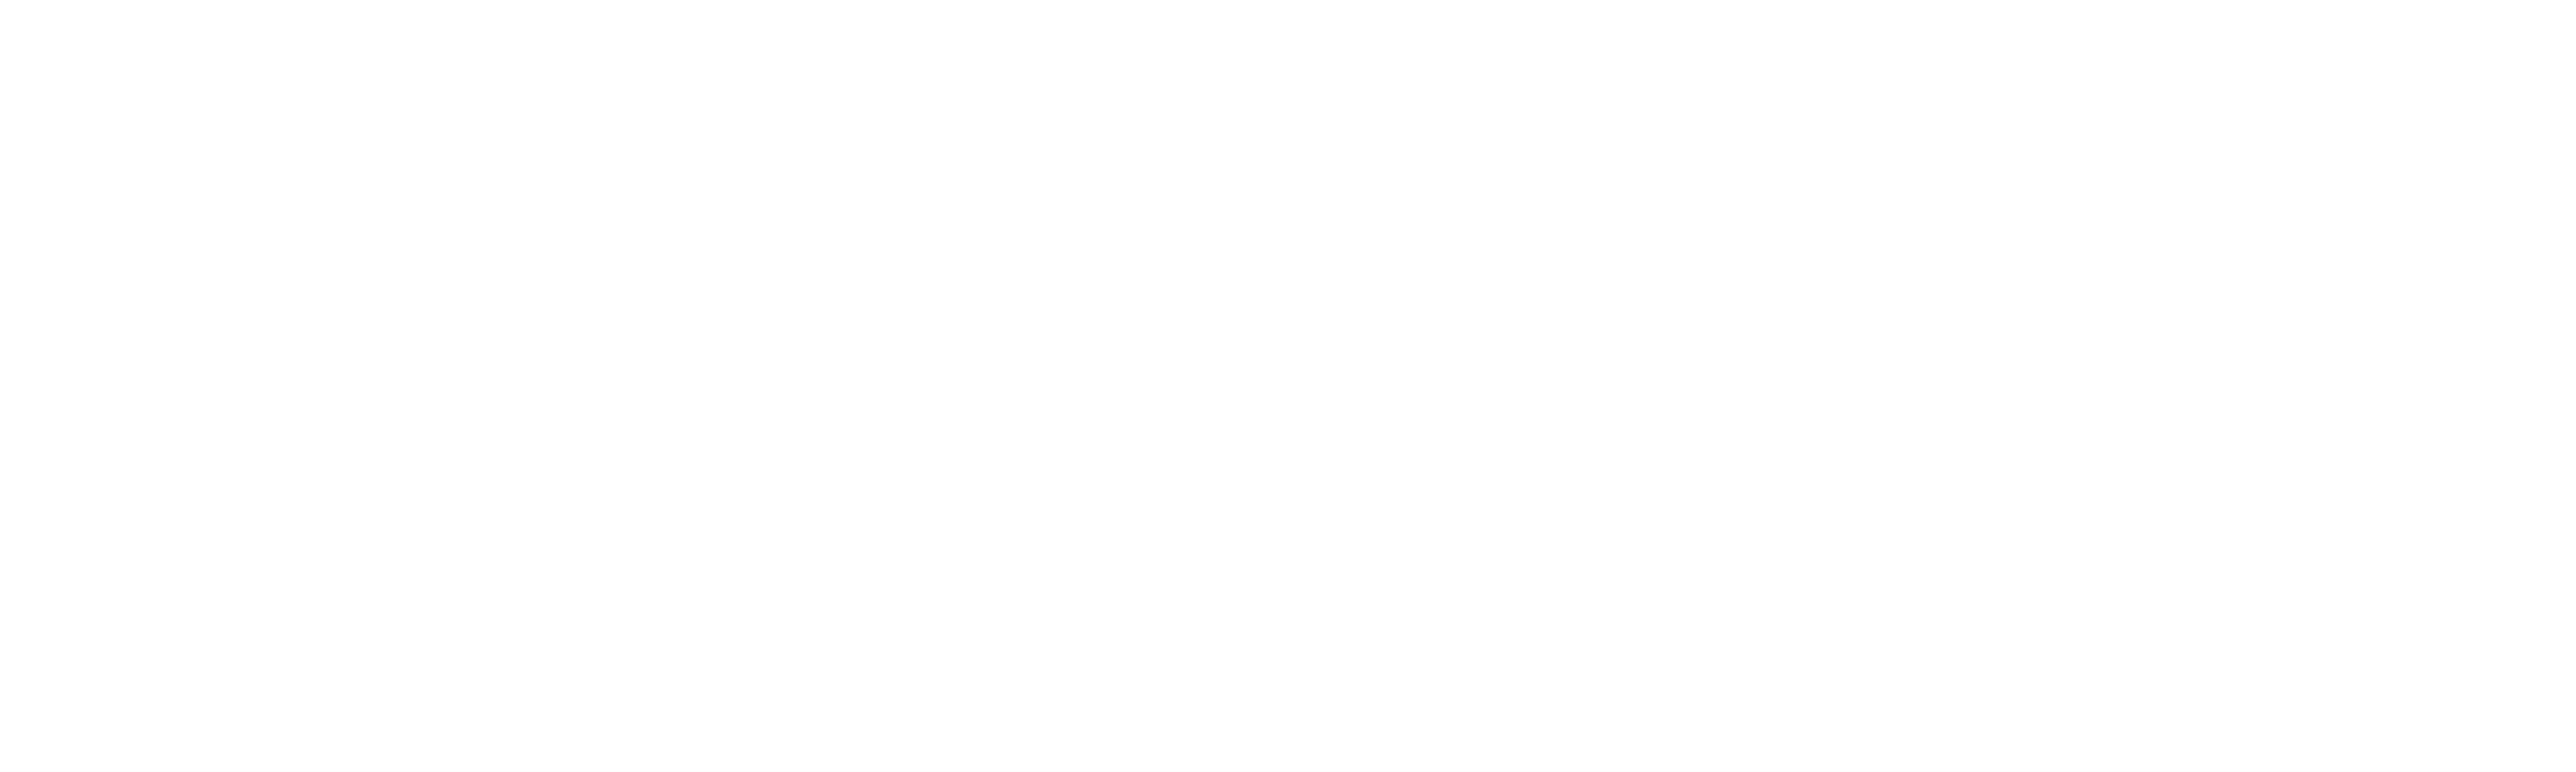

/mnt/home/szheng/ceph/place_variability/fig/general/e15_13f1 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


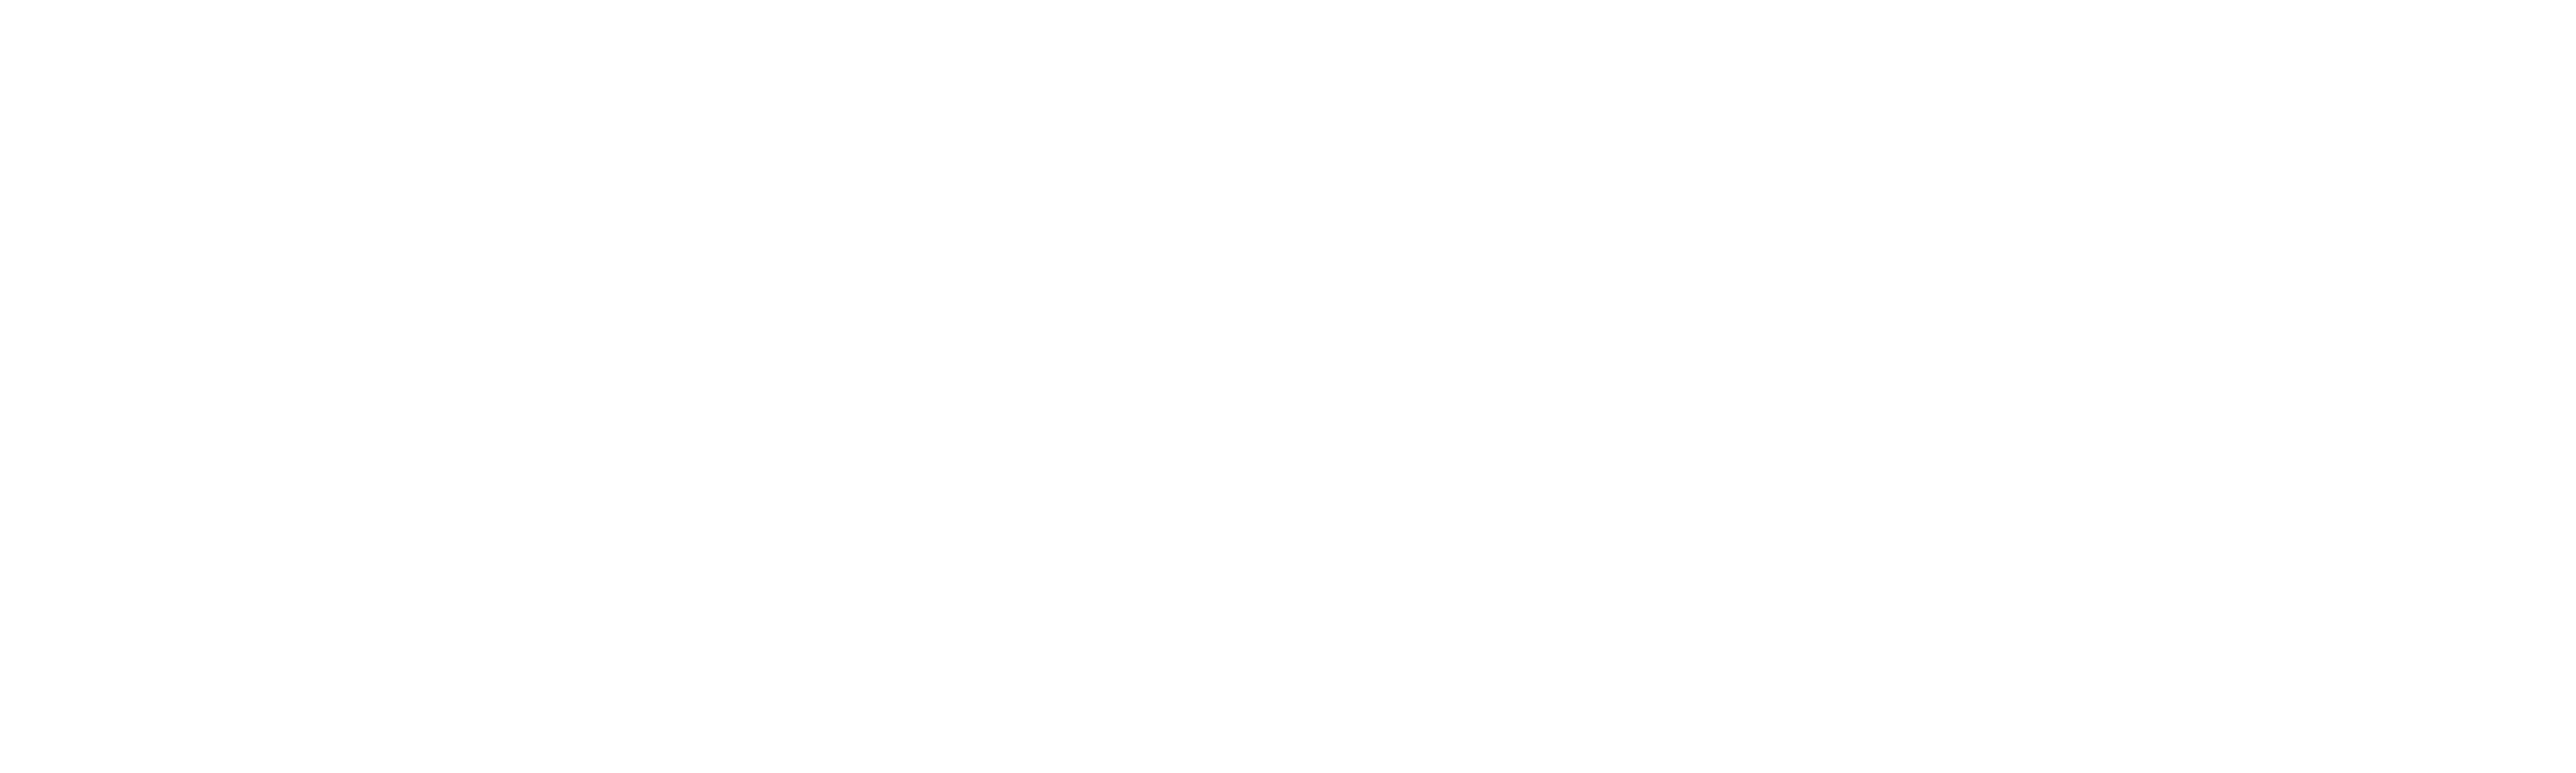

/mnt/home/szheng/ceph/place_variability/fig/general/e15_13f1/e15_13f1_220117 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


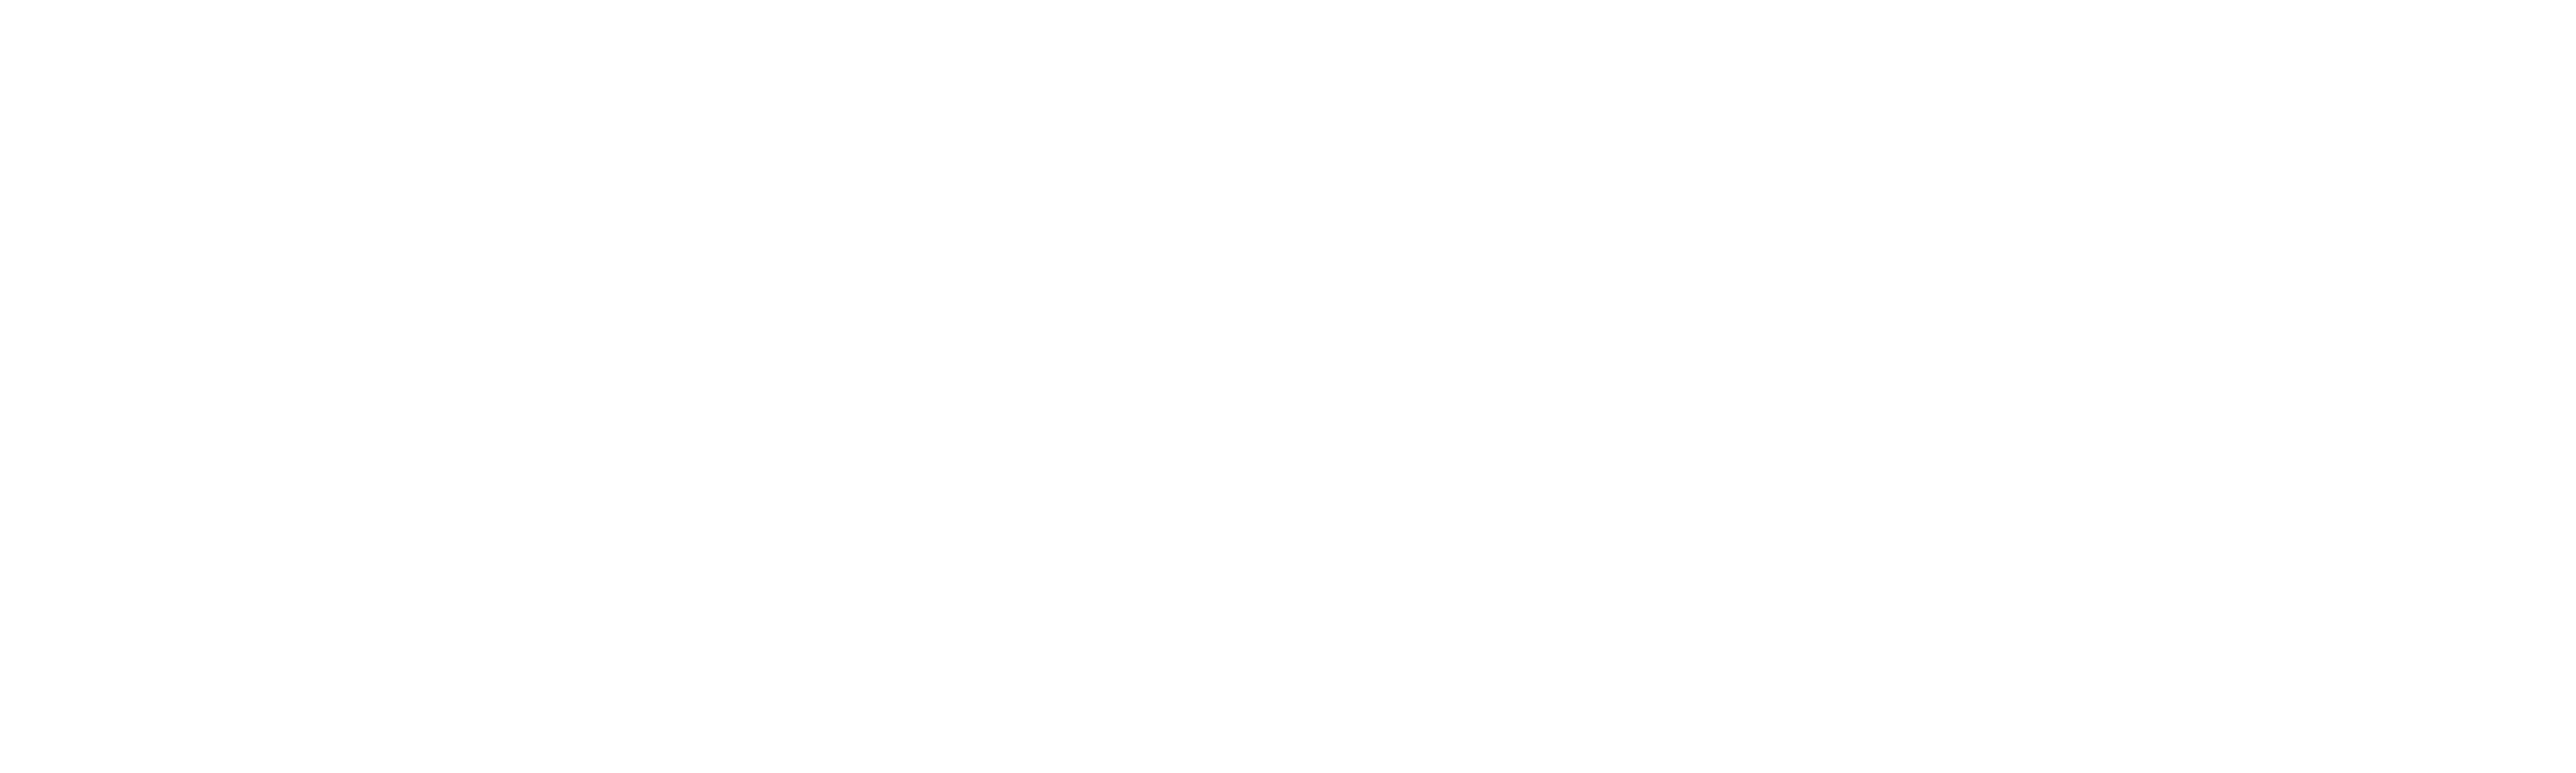

/mnt/home/szheng/ceph/place_variability/fig/general/e15_13f1/e15_13f1_220118 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


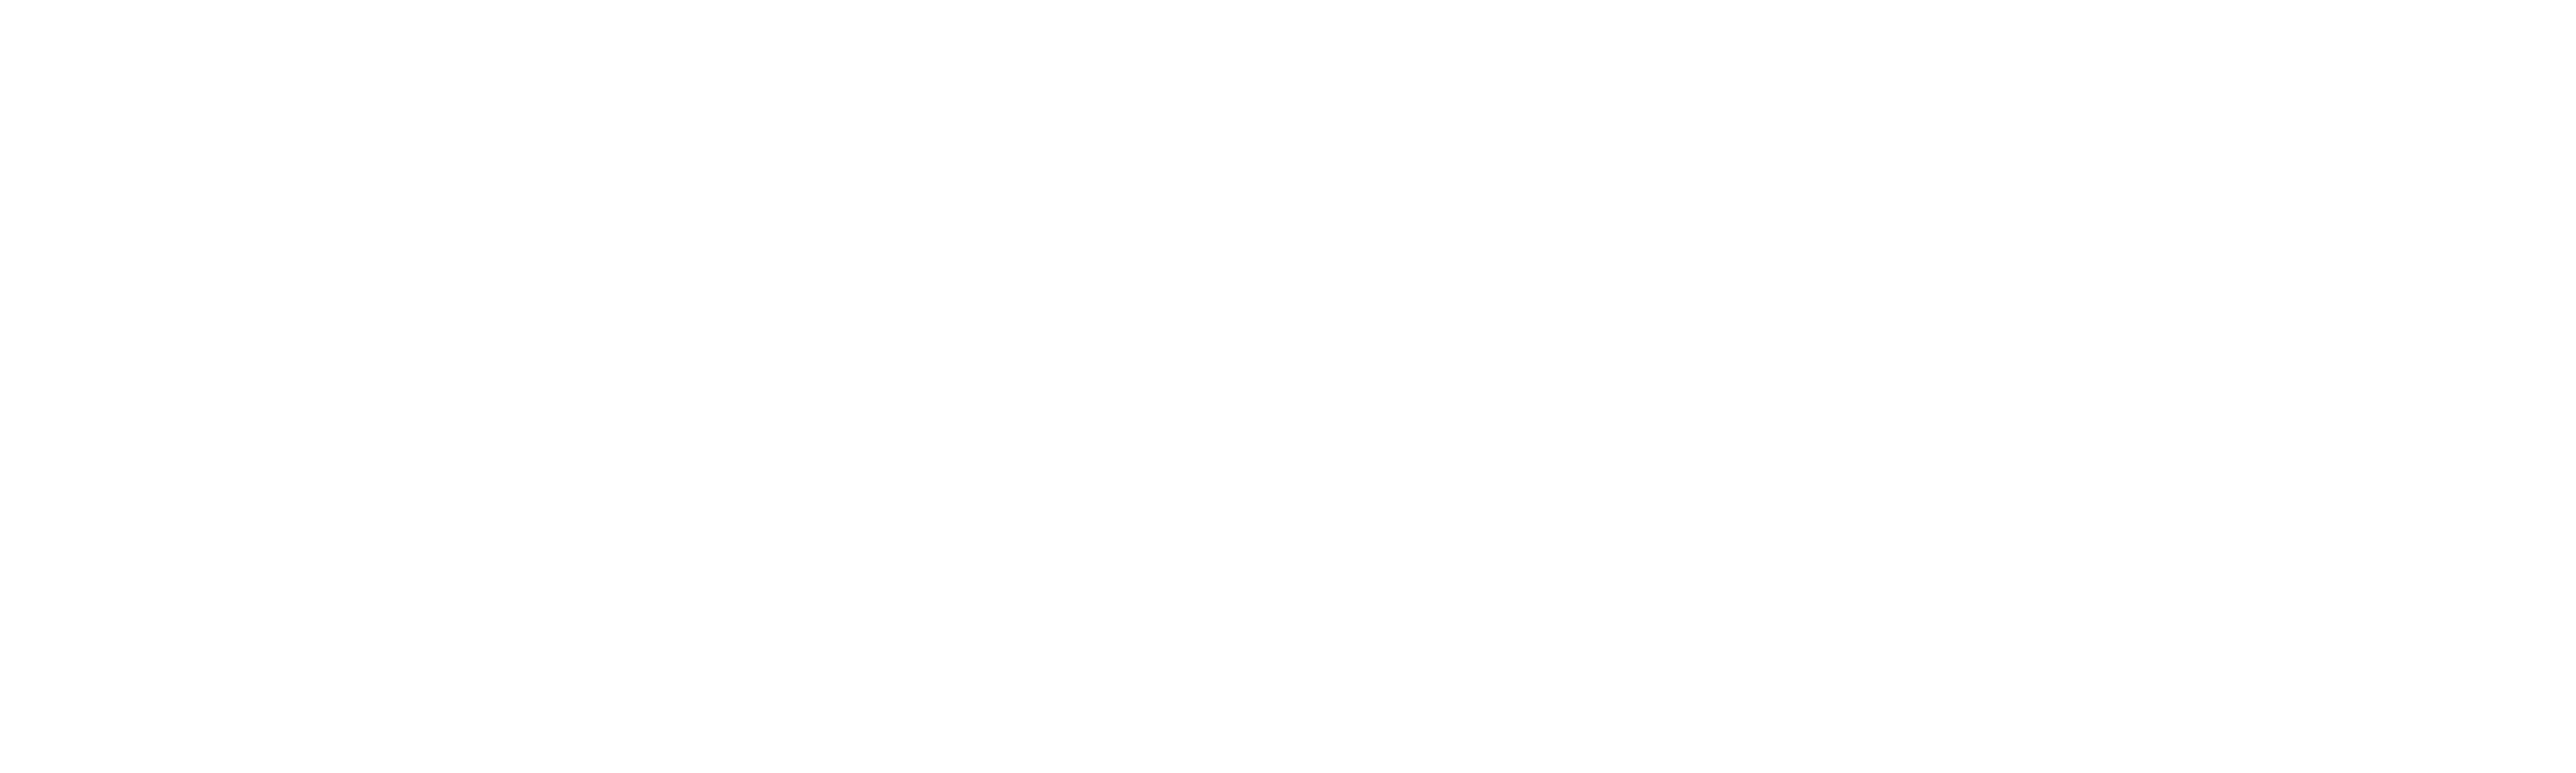

/mnt/home/szheng/ceph/place_variability/fig/general/e15_13f1/e15_13f1_220120 made!


<IPython.core.display.Javascript object>


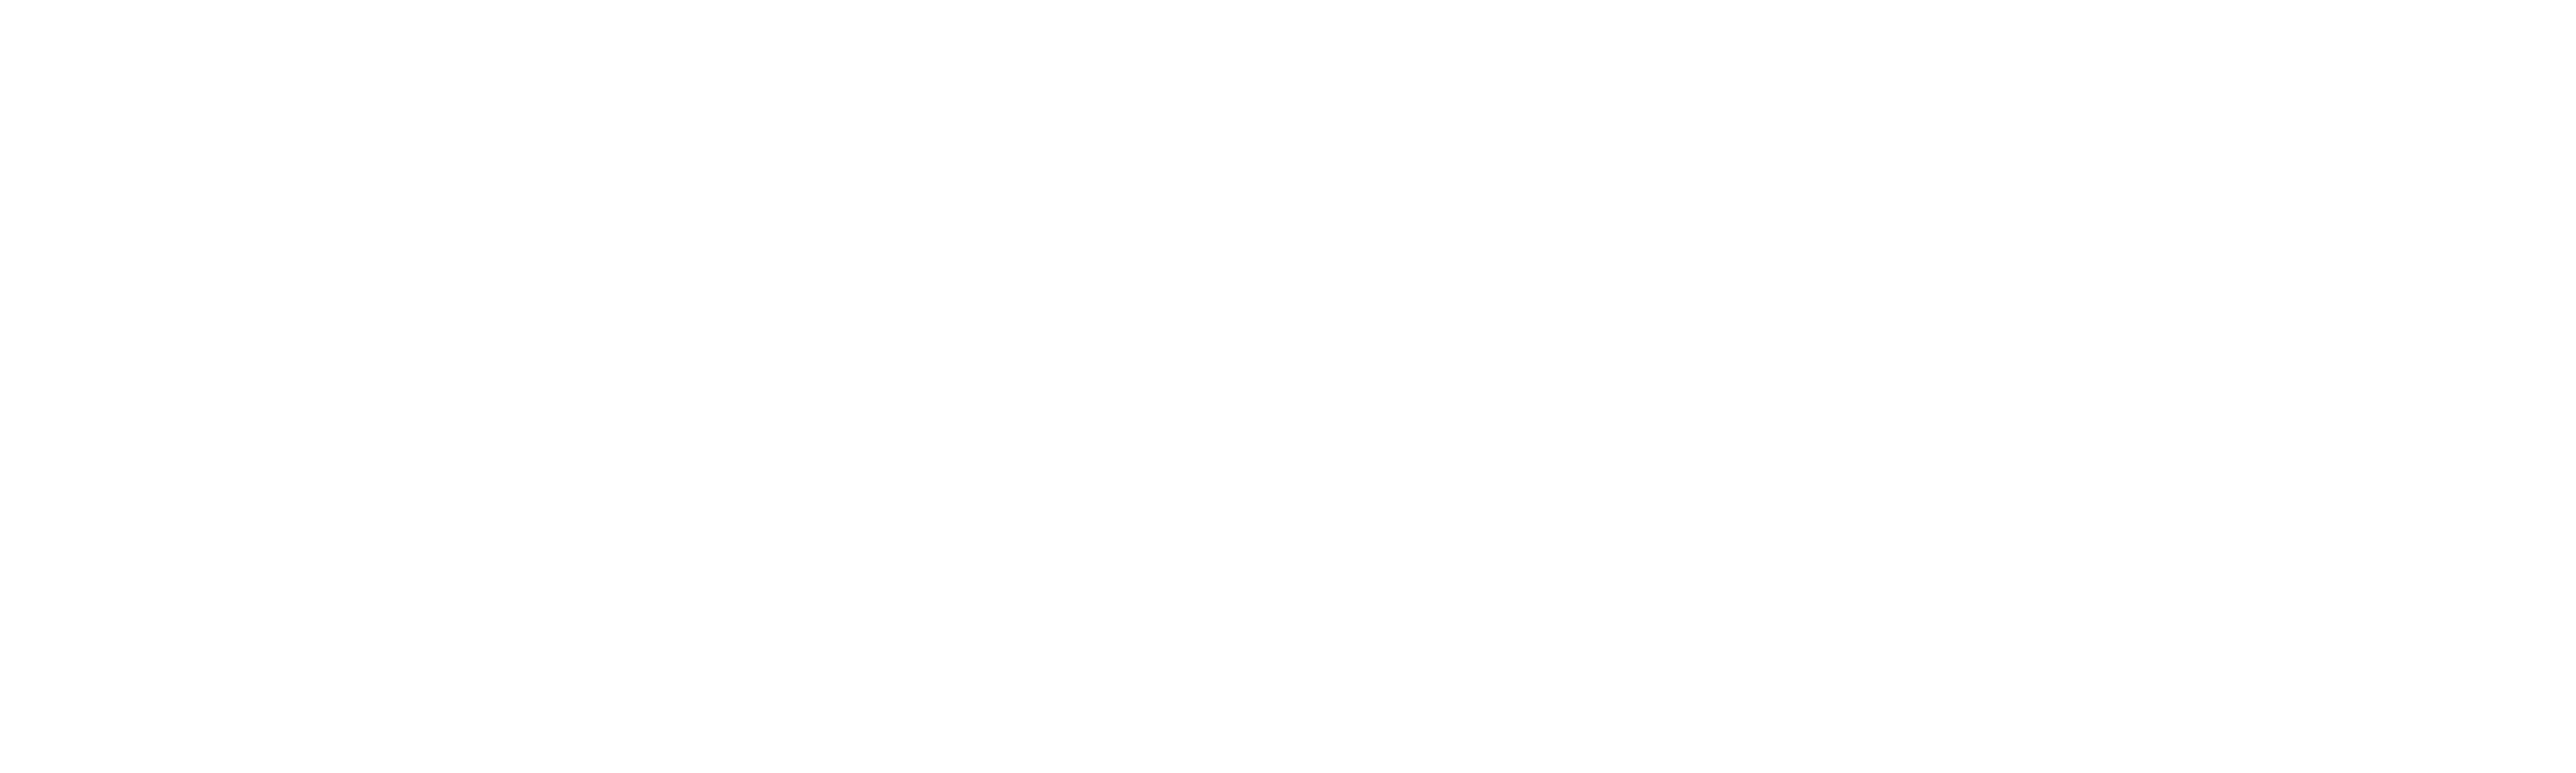

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


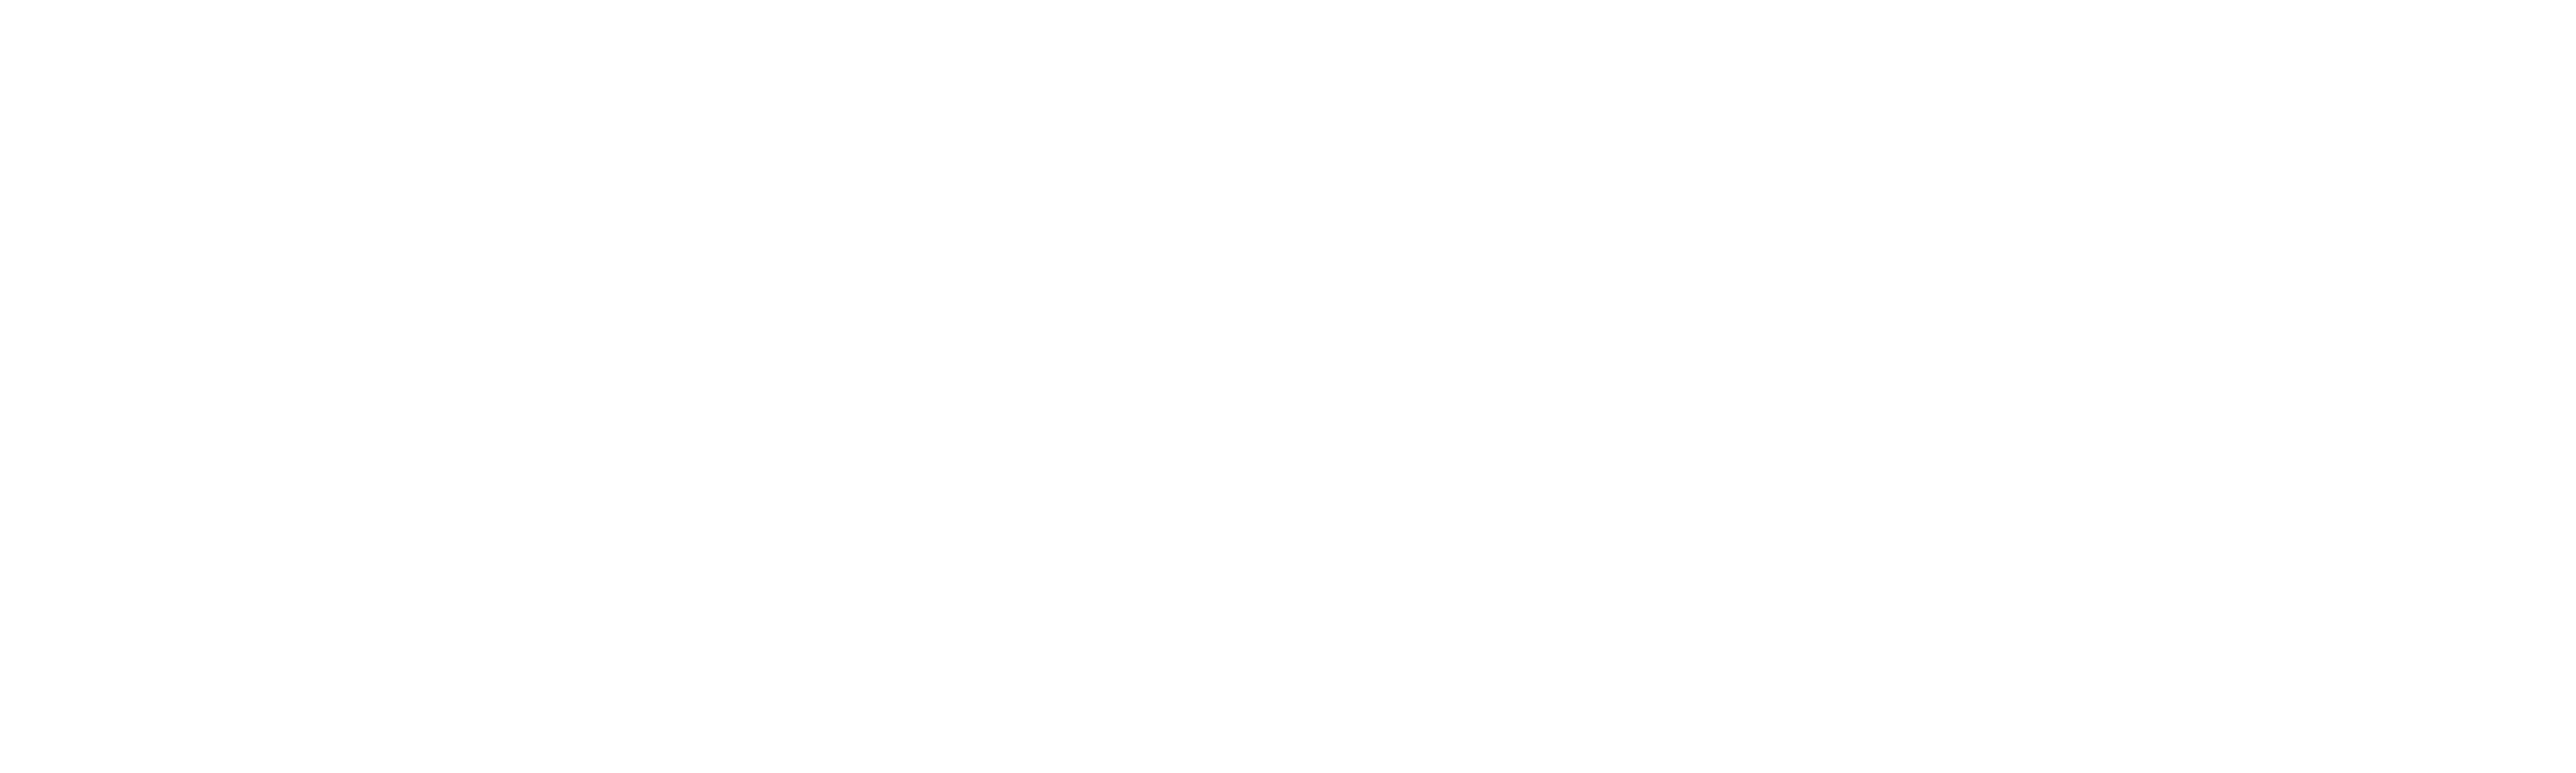

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200823 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


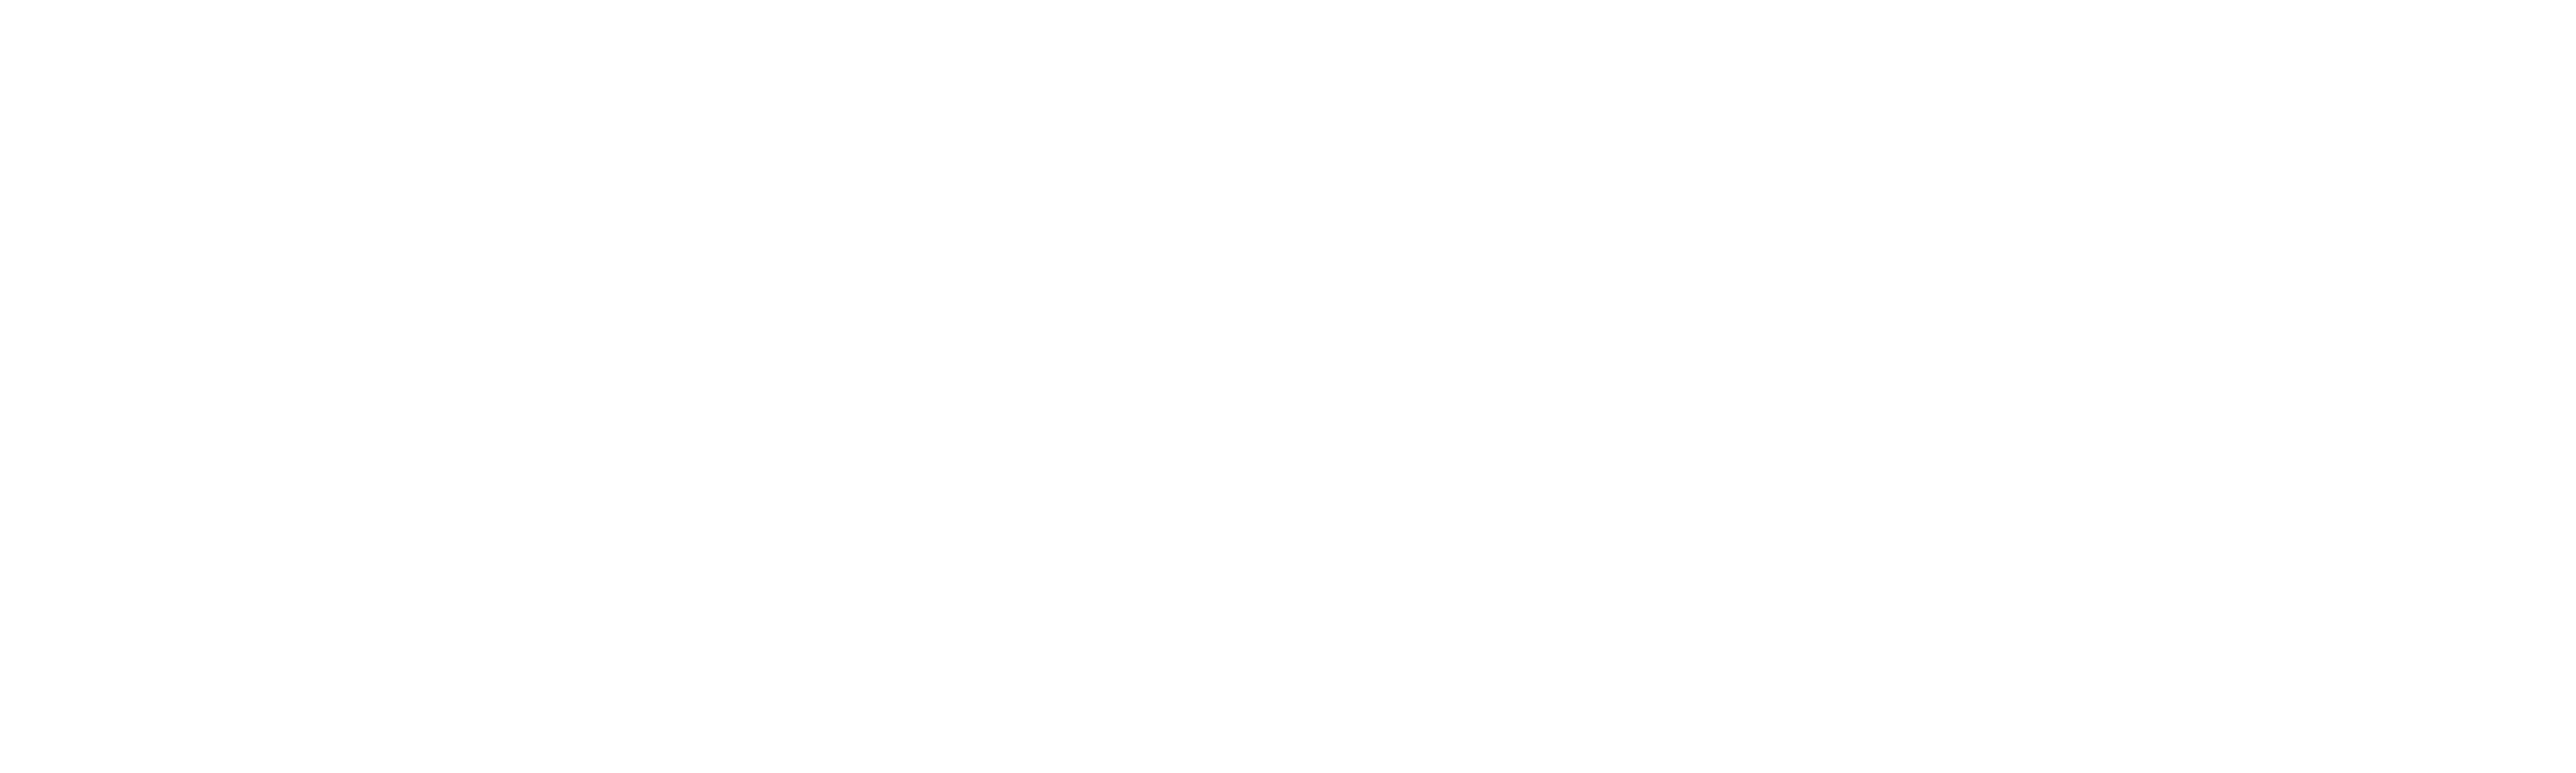

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200824 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


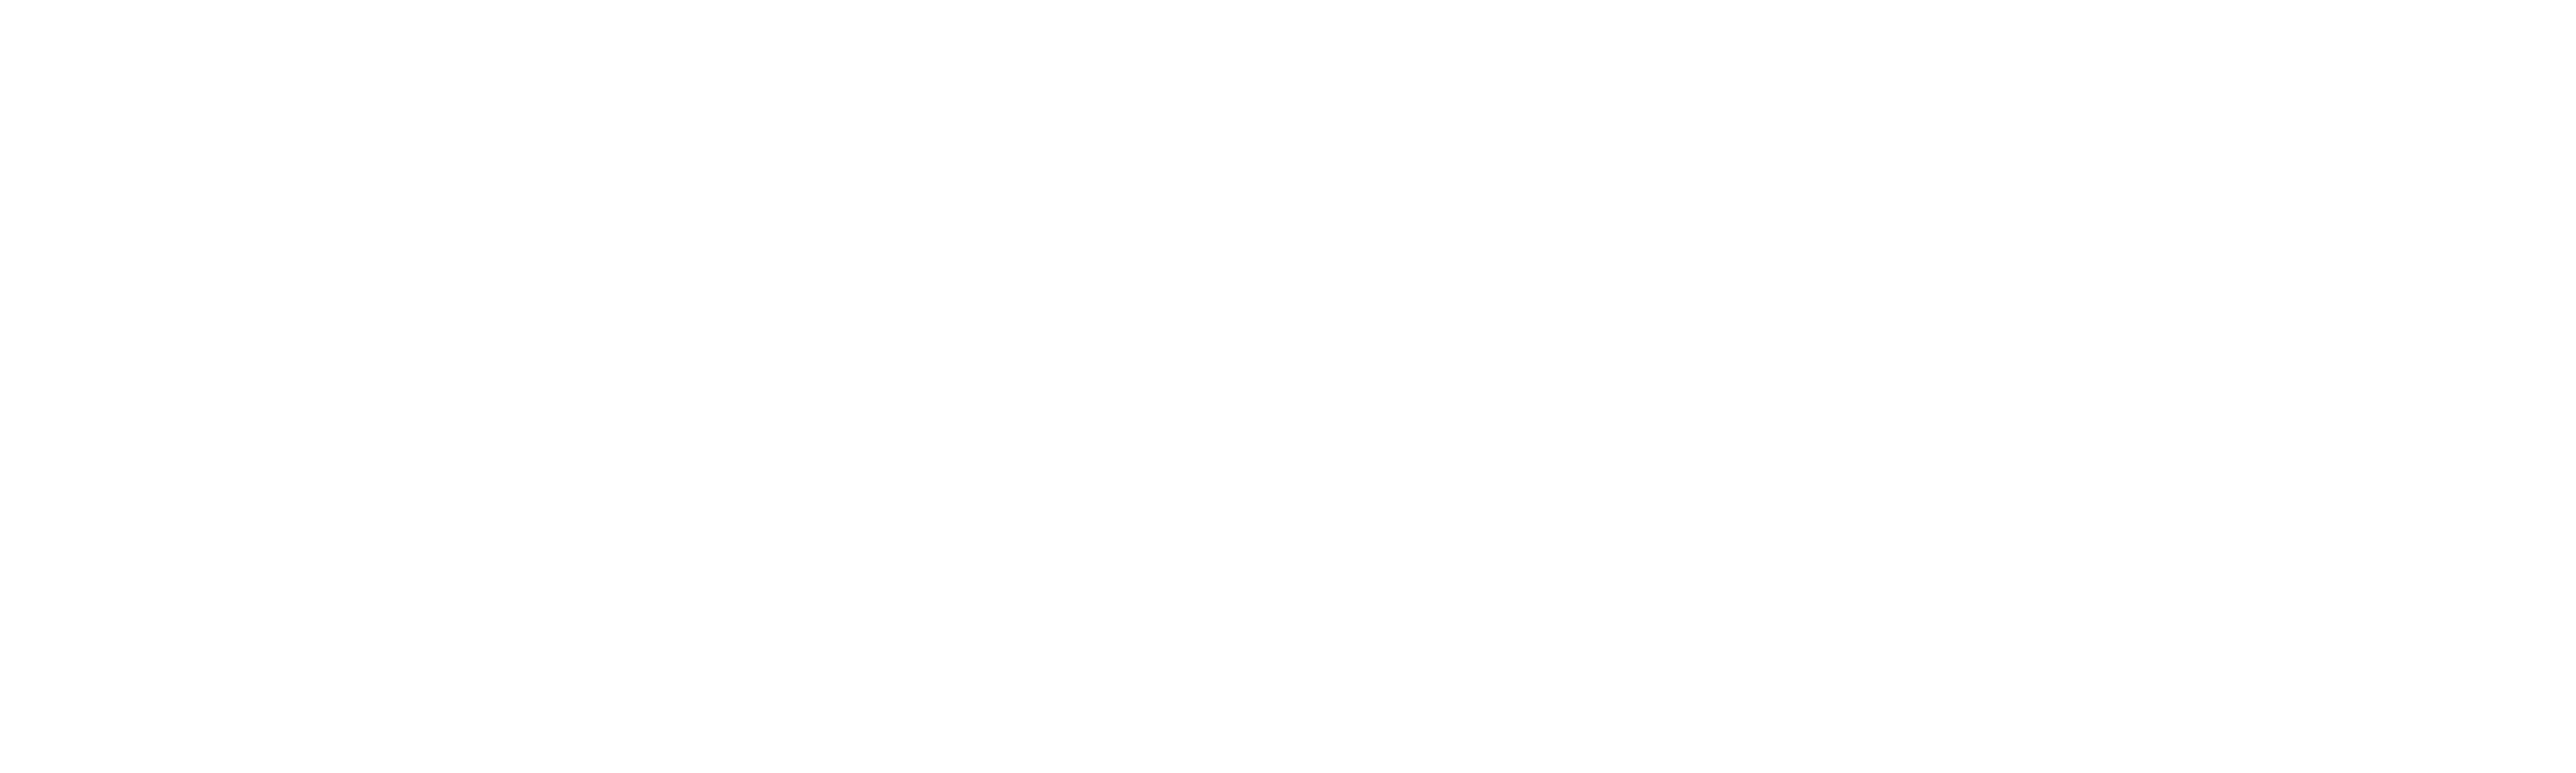

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200917 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:262: RuntimeWarning: invalid value encountered in true_divide
  frac_per_pos = sw_count_per_pos / baseline_count
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:262: RuntimeWarning: divide by zero encountered in true_divide
  frac_per_pos = sw_count_per_pos / baseline_count


<IPython.core.display.Javascript object>


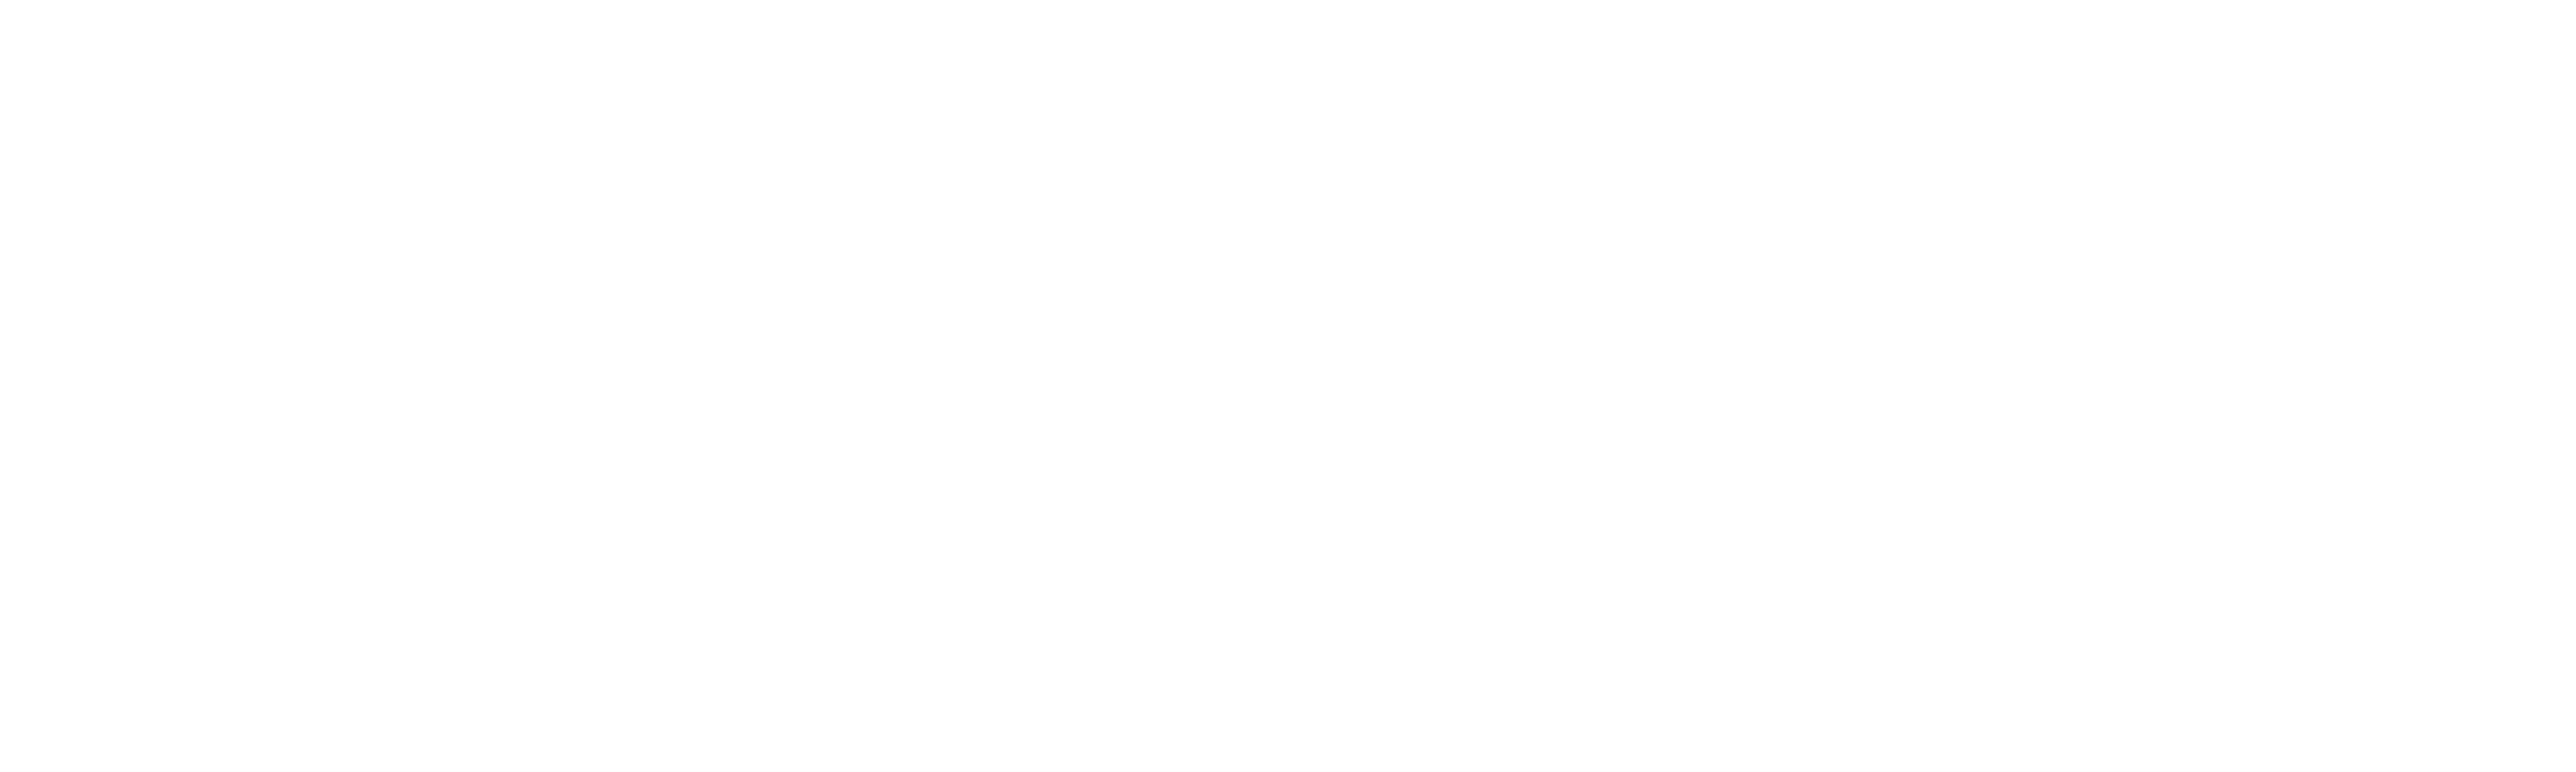

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200918 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


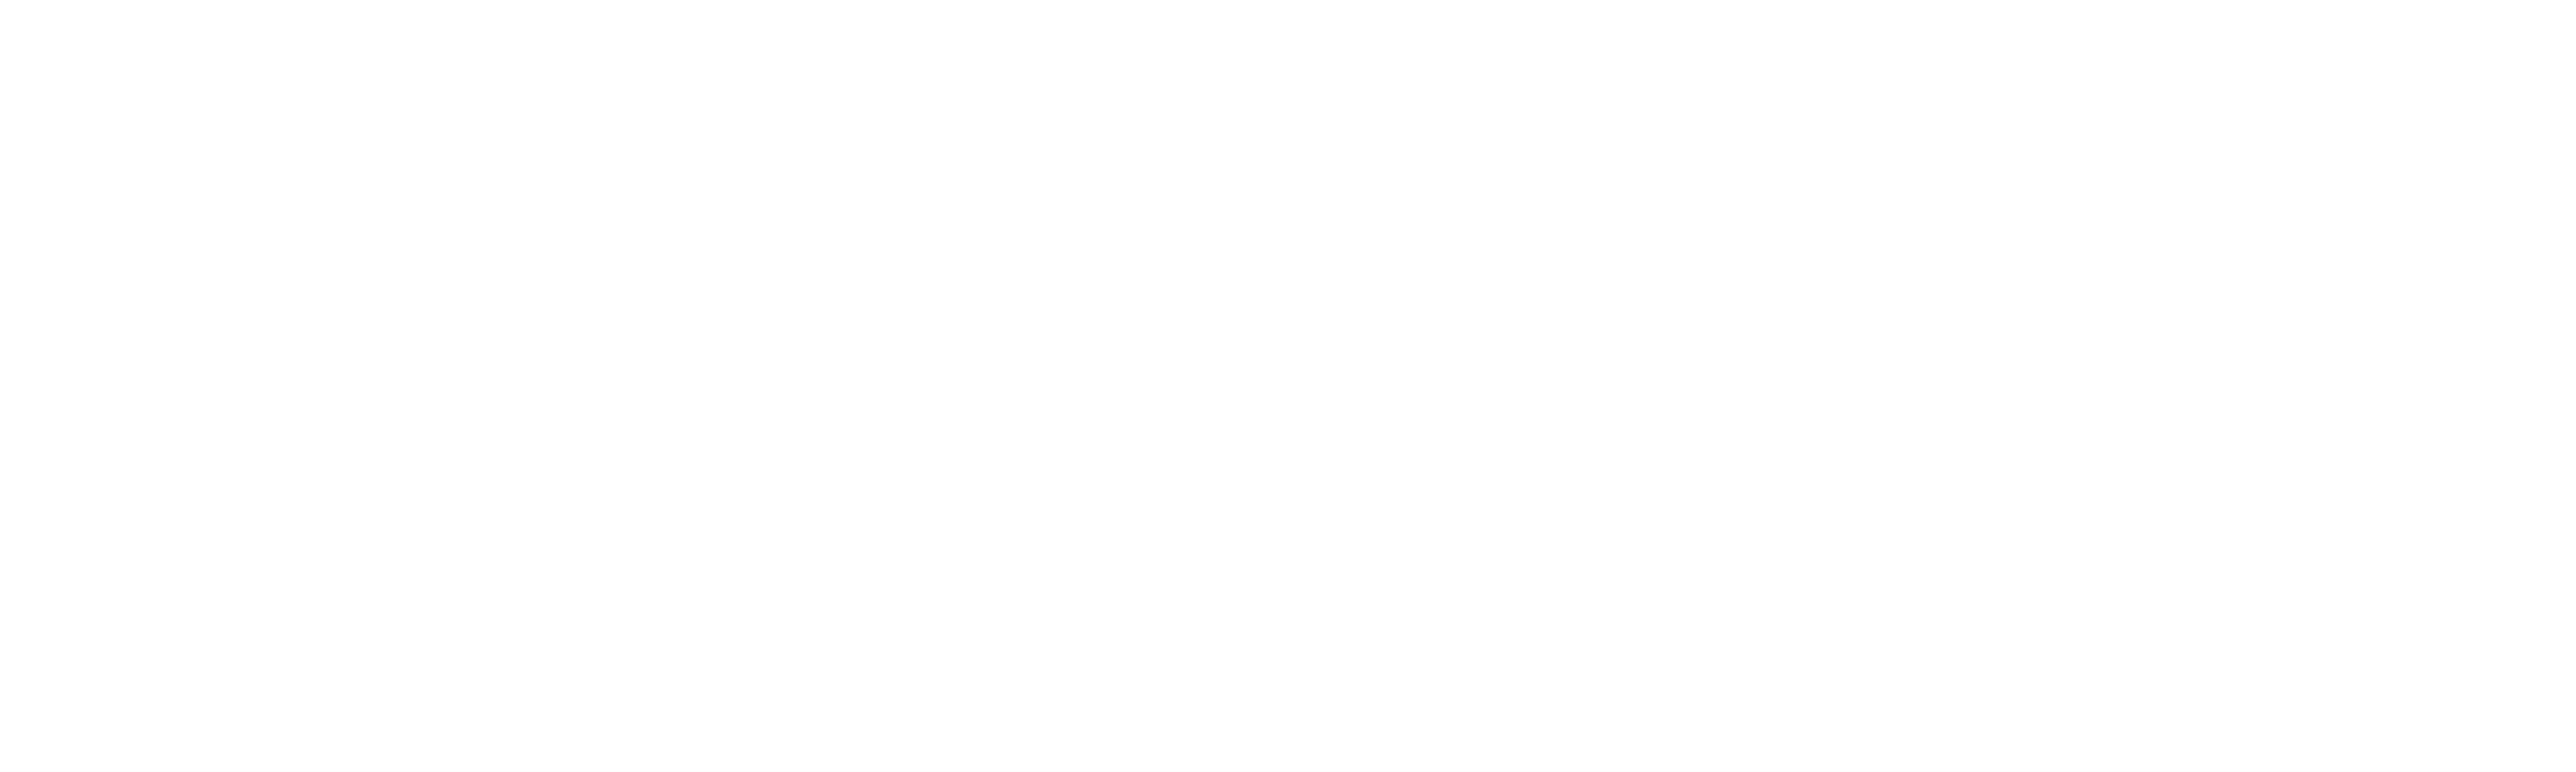

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200919 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


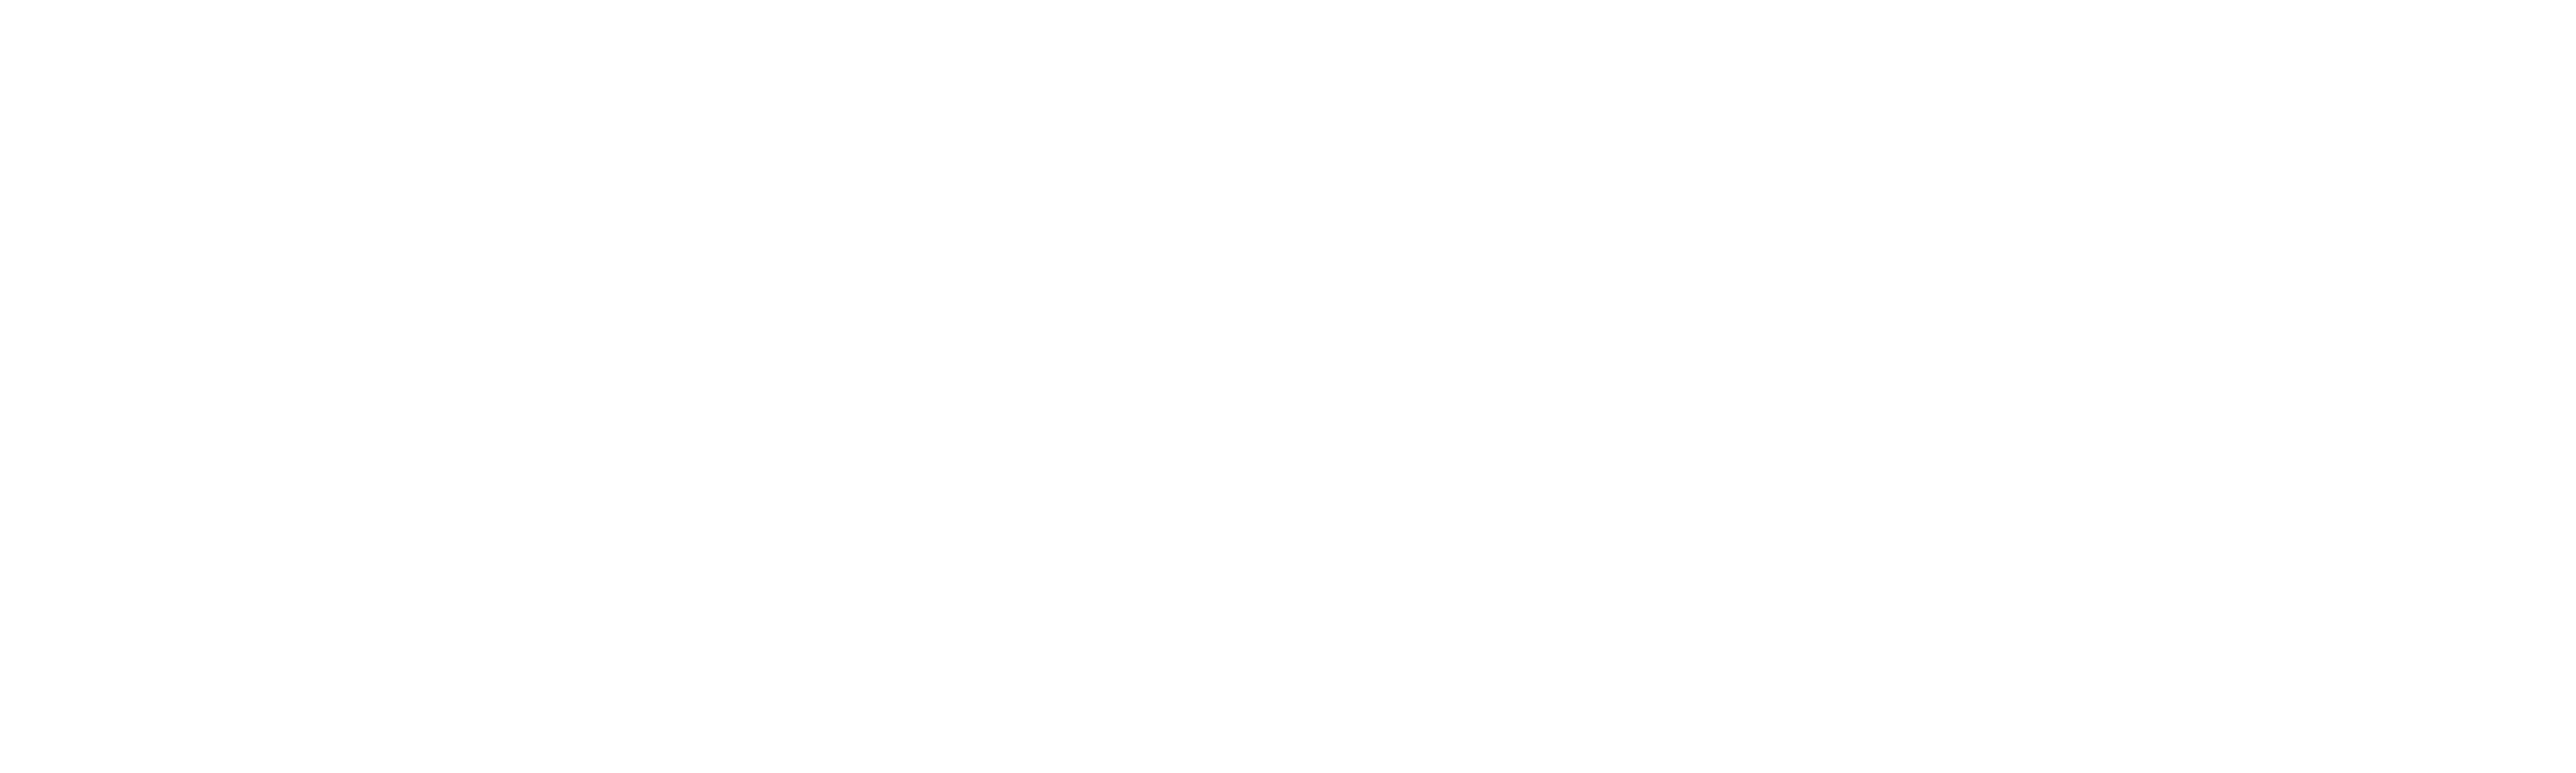

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200920 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


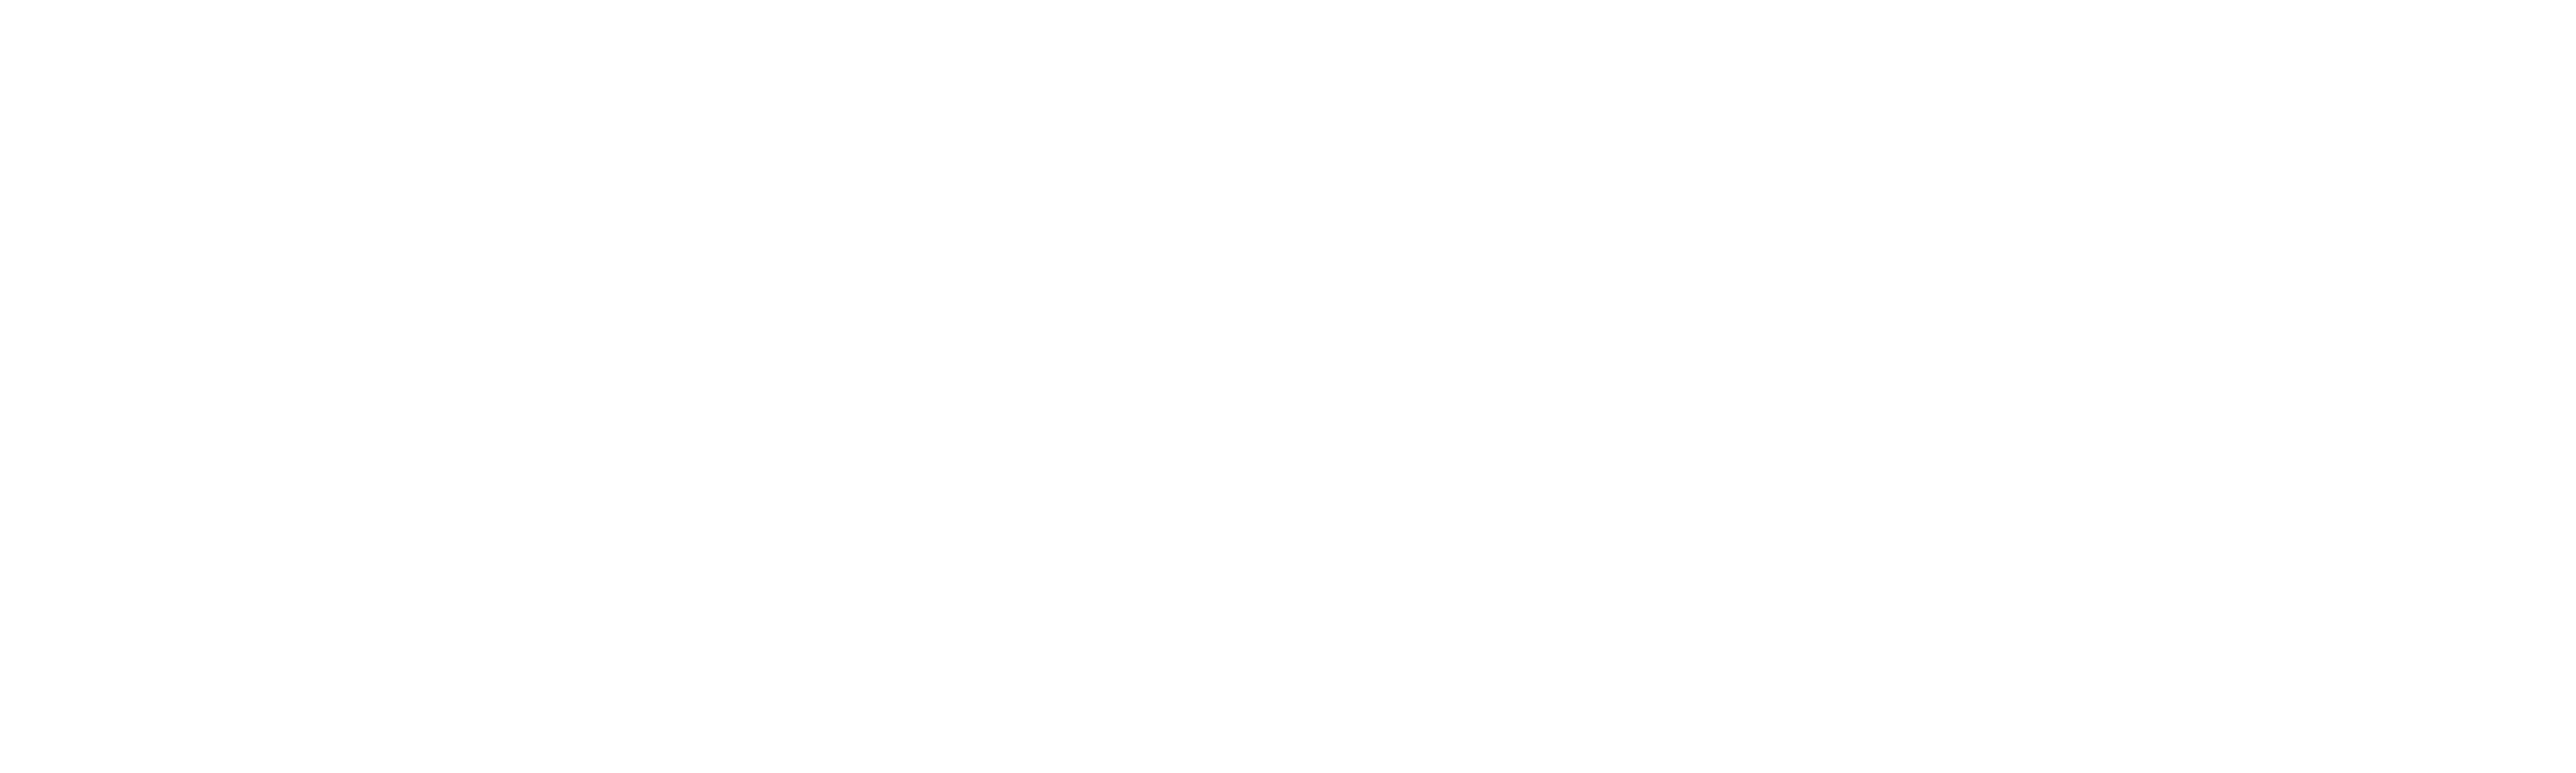

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200923 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


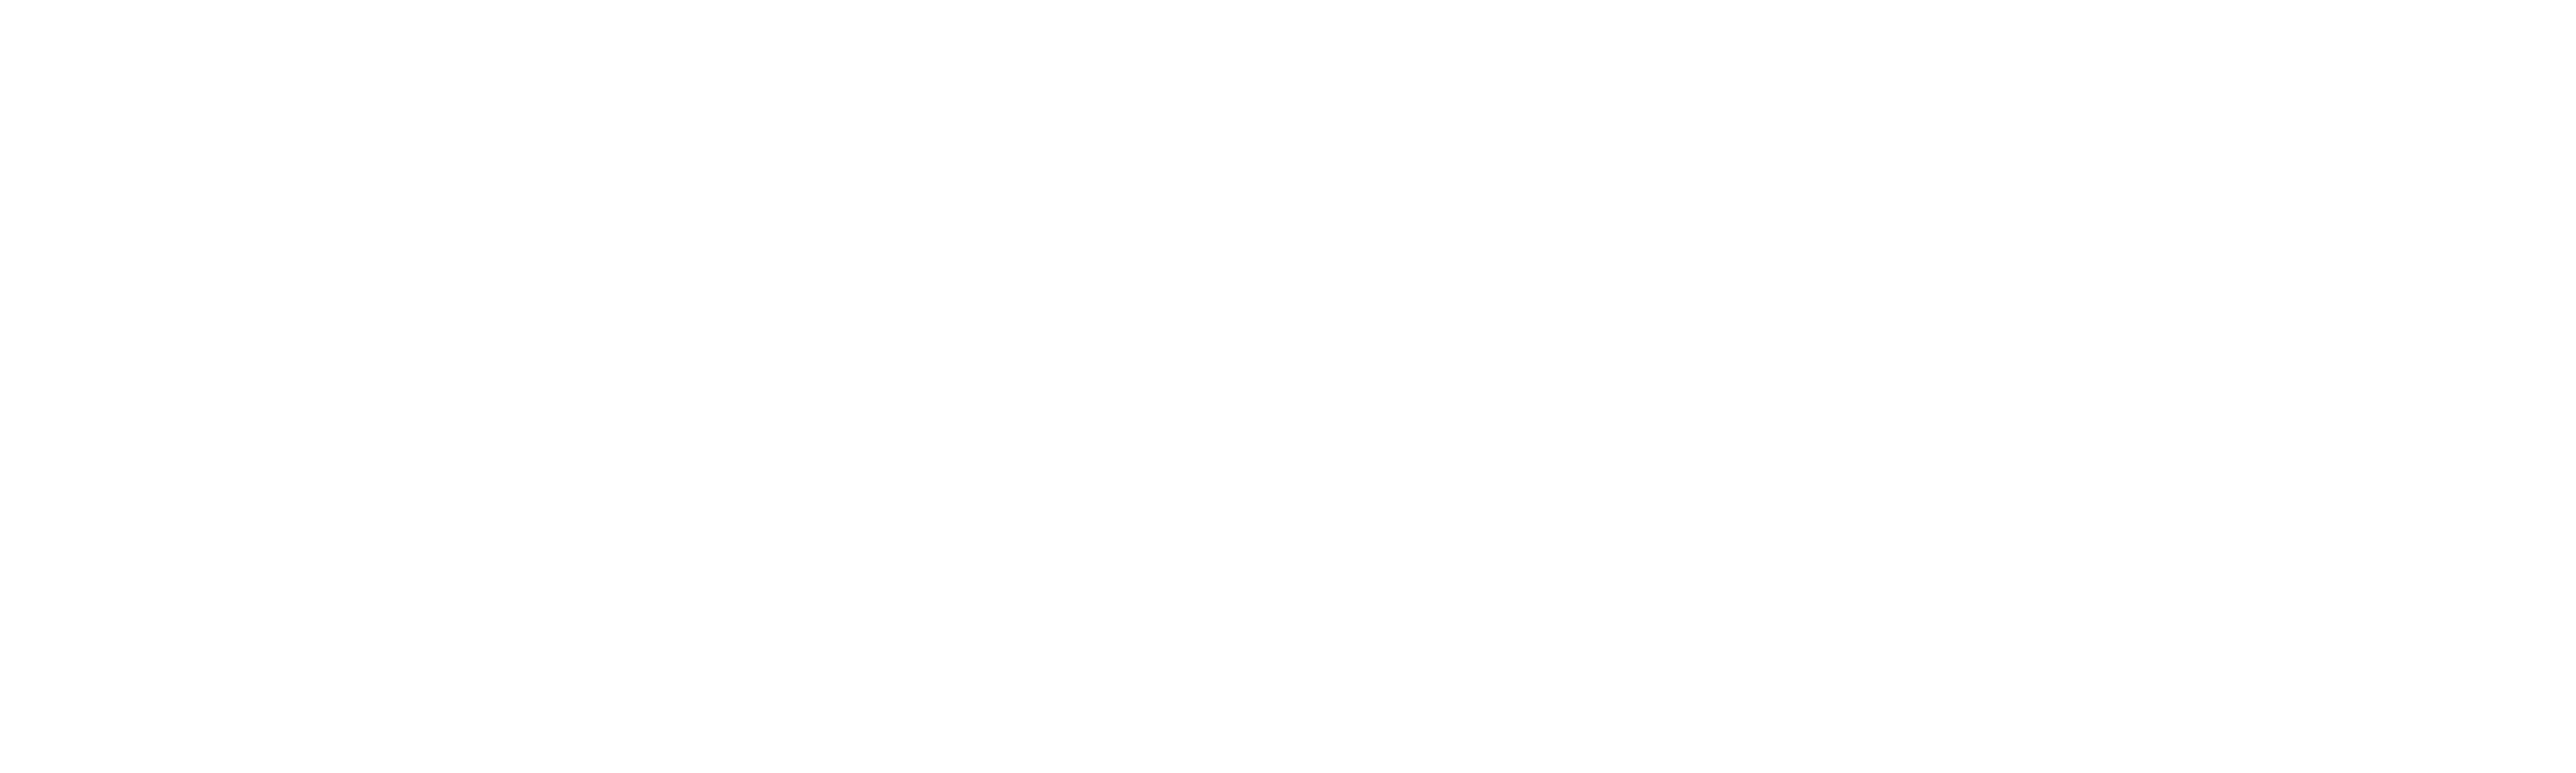

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_201001 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


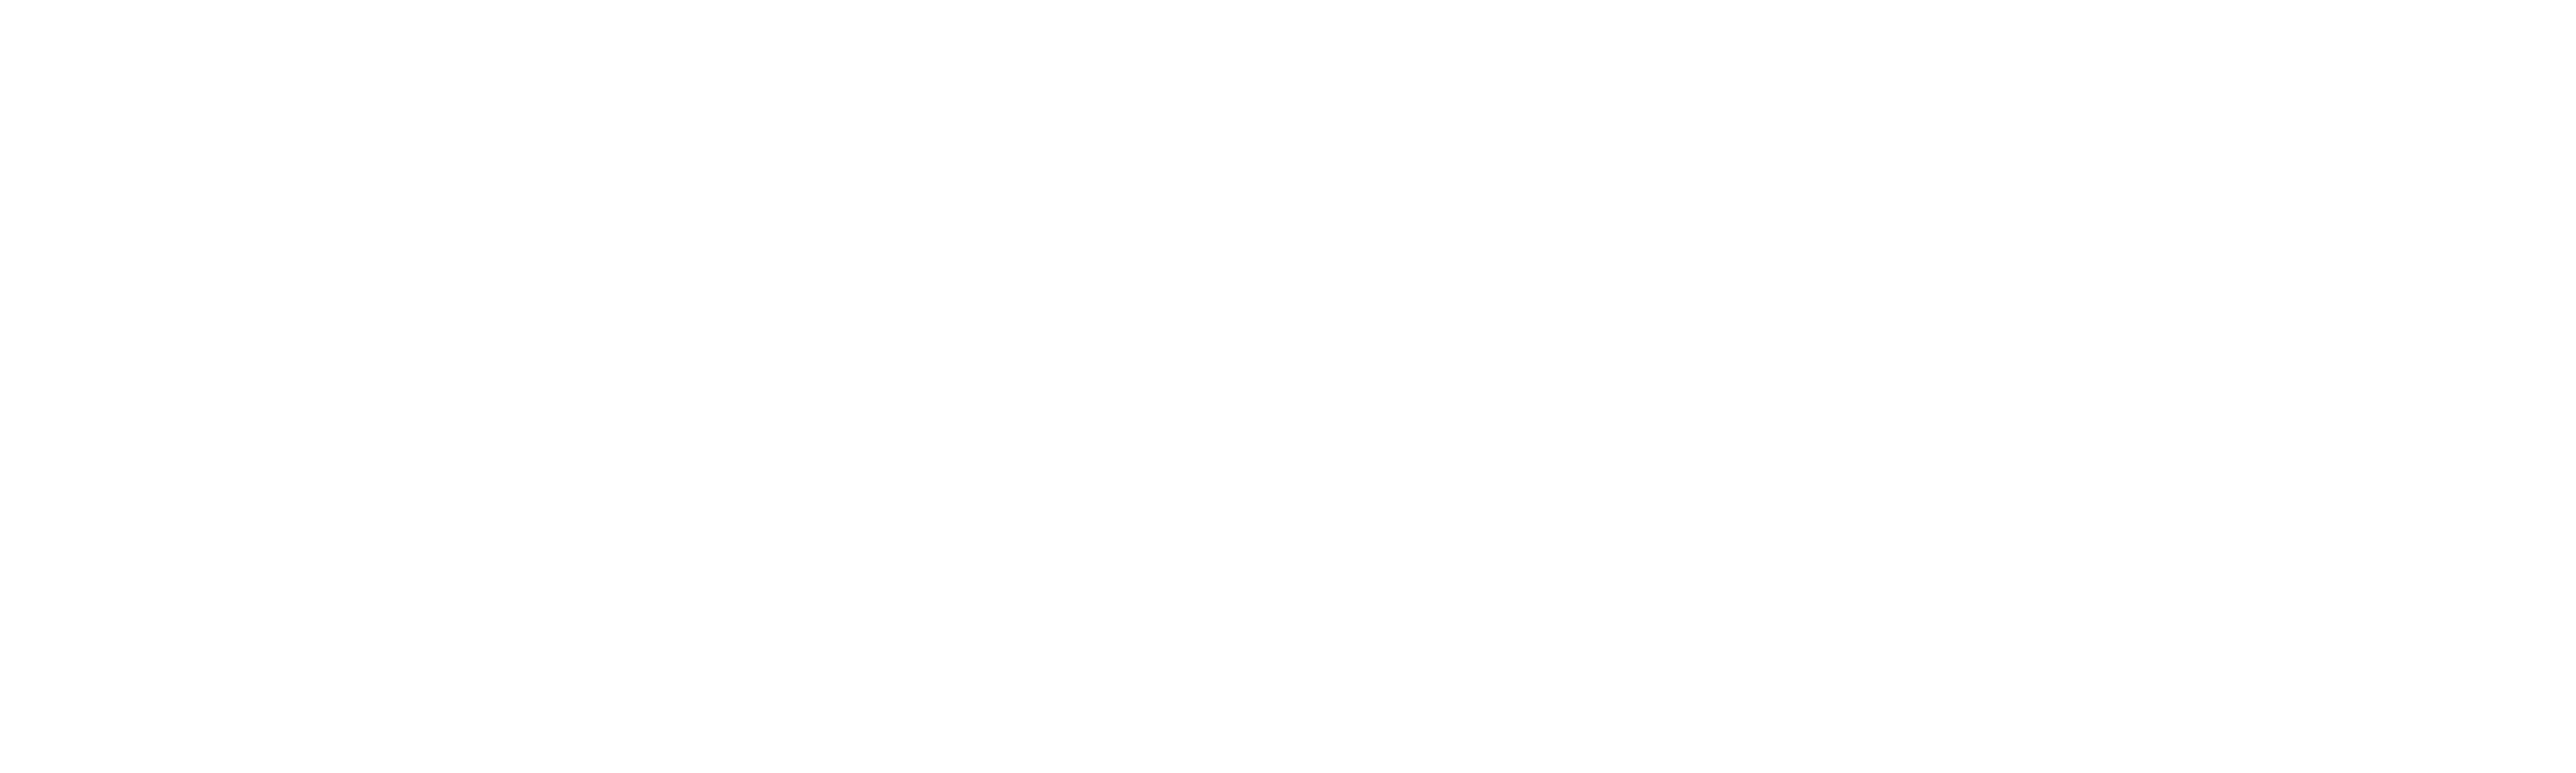

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_201002 made!


/tmp/ipykernel_2788848/3185201551.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw = all_sw_info_all.loc[ani,sess]
/tmp/ipykernel_2788848/3185201551.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = pf_all_field_combined_all.loc[ani,sess]


<IPython.core.display.Javascript object>


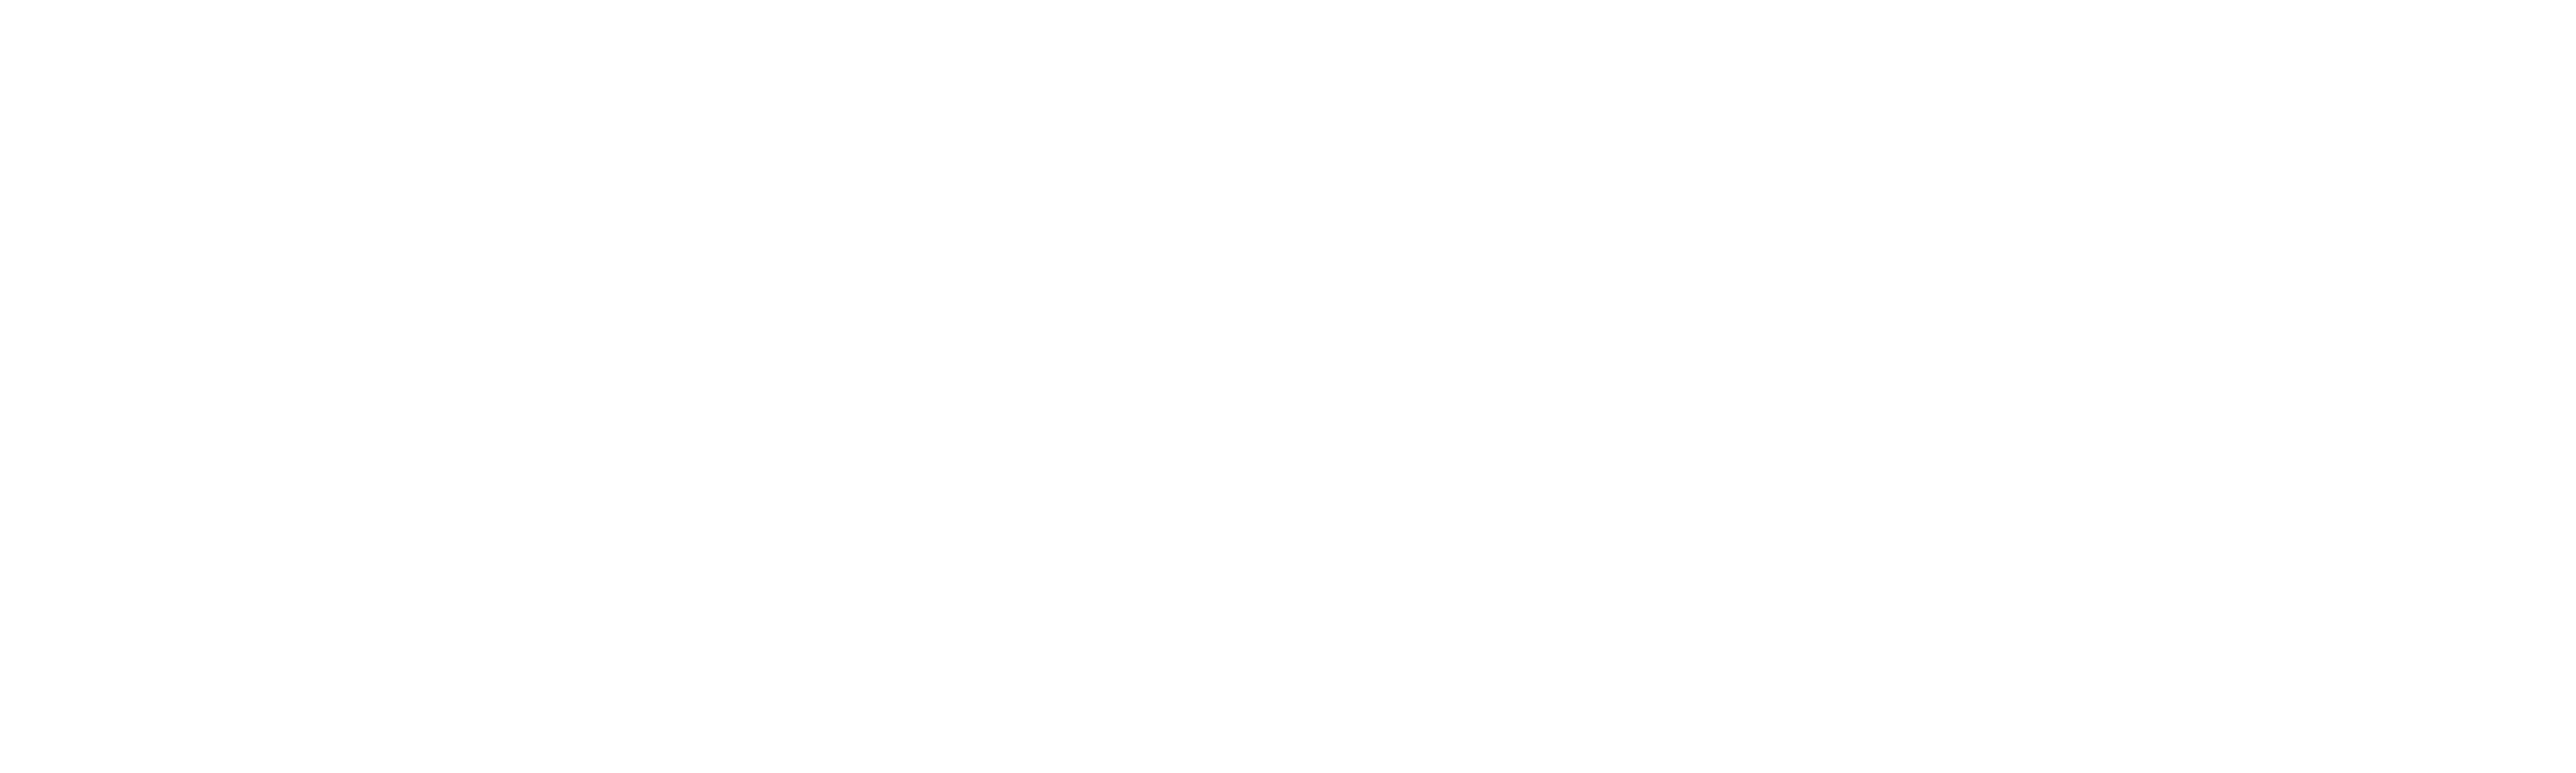

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_201004 made!


In [269]:
%matplotlib auto
all_sw = all_sw_info_all
all_fields = pf_all_field_combined_all
sw_count_per_pos_d, baseline_count, frac_per_pos_d, edges,fig,axs = sm.plot_switch_field_ratio(all_sw,all_fields,
                                                                                            n_bootstrap_repeats=None,
                                                                                            doplot=True)
save_dir_full = misc.get_or_create_subdir(save_dir_root)
fn_full = os.path.join(save_dir_full,'switch_spatial_distribution.pdf')
fig.savefig(fn_full,bbox_inches='tight')
plt.close(fig)

ani_gpb = all_sw_info_all.groupby(level=0)
for ani,val in ani_gpb:
    all_sw = all_sw_info_all.loc[ani]
    all_fields = pf_all_field_combined_all.loc[ani]
    sw_count_per_pos_d, baseline_count, frac_per_pos_d, edges,fig,axs = sm.plot_switch_field_ratio(all_sw,all_fields,
                                                                                            n_bootstrap_repeats=None,
                                                                                            doplot=True)
    
    save_dir_full_ani = misc.get_or_create_subdir(save_dir_root,ani)
    fn_full = os.path.join(save_dir_full_ani,'switch_spatial_distribution.pdf')
    fig.savefig(fn_full,bbox_inches='tight')
    plt.close(fig)
    
    sess_gpb = val.loc[ani].groupby(level=0)
    for sess, valval in sess_gpb:
        all_sw = all_sw_info_all.loc[ani,sess]
        all_fields = pf_all_field_combined_all.loc[ani,sess]
        sw_count_per_pos_d, baseline_count, frac_per_pos_d, edges,fig,axs = sm.plot_switch_field_ratio(all_sw,all_fields,
                                                                                            n_bootstrap_repeats=None,
                                                                                            doplot=True)
        save_dir_full_ani_sess = misc.get_or_create_subdir(save_dir_full_ani,sess)
        fn_full = os.path.join(save_dir_full_ani_sess,'switch_spatial_distribution.pdf')
        fig.savefig(fn_full,bbox_inches='tight')
        plt.close(fig)
        
    

# explore metrics

In [277]:
import itertools
from itertools import product
fr_info_keys = [f'{pp}_mean_fr_{n}' for (pp,n) in itertools.product(['pre','post'],[1,2,3,'all'])] # eg pre_mean_fr_1
fr_info_keys =  fr_info_keys + [p+'_norm' for p in fr_info_keys]

ntrial_info_keys = [f'{pp}_ntrial_{lg}_{n}_perc' for (pp,lg,n) in product(['pre','post'],['le','ge'],[10,30,50,70,90])]
ntrial_info_keys = ntrial_info_keys +  [k+'_frac_segment' for k in ntrial_info_keys] + [k+'_frac_total' for k in ntrial_info_keys]

extra_info_keys = fr_info_keys + ntrial_info_keys
extra_info = {k:[] for k in extra_info_keys}

In [383]:
# extra_info_keys = ['switch_trial','switch_trial_frac','pre_mean_fr_all','post_mean_fr_all','pre_mean_fr_all_norm','post_mean_fr_all_norm','pre_ntrial_le_30_perc','pre_ntrial_le_30_perc_frac_segment','post_ntrial_ge_50_perc','post_ntrial_ge_50_perc_frac_segment']

# # extra_info_keys = ['v','pre_mean_fr_all_norm','post_mean_fr_all_norm','pre_mean_fr_3_norm','post_mean_fr_3_norm','post_mean_fr_1_norm','post_mean_fr_2_norm']

# extra_info_keys = ['switch_trial_frac','pre_mean_fr_all_norm']




In [319]:
import pingouin as pg

In [6]:
onoff = 1
all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
onoffstr = {1:'on',-1:'off'}[onoff]

In [402]:
save_dir_root

'/mnt/home/szheng/ceph/place_variability/fig/general'

In [409]:
info_key_l = ['pre_mean_fr_all_norm','post_mean_fr_all_norm','pre_ntrial_le_30_perc_frac_segment','post_ntrial_ge_50_perc_frac_segment']




# pairwise plot of selected metrics 

In [17]:
onoffstr_d = {1:'on',-1:'off'}

In [15]:
save_dir_root = "/mnt/home/szheng/ceph/place_variability/fig/general"

In [19]:
info_key_l = ['pre_mean_fr_all_norm','post_mean_fr_all_norm',
              'pre_mean_fr_3_norm','post_mean_fr_3_norm',
              'pre_ntrial_le_30_perc_frac_segment','post_ntrial_ge_50_perc_frac_segment',
              
             ]
x='switch_trial_frac'
# y='pre_mean_fr_all_norm'
onoff = 1
for y in info_key_l:

    all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
    onoff_str=onoffstr_d[onoff]
    ax=sns.jointplot(data=all_sw_info_all_onoff,x=x,y=y,kind='hist',cmap='Greys',
                  xlim=[0,1]
                 )
    fig = ax.figure
    fn_full = os.path.join(save_dir_root,f'{y}_vs_{x}_{onoff_str}.pdf')
    fig.savefig(fn_full,bbox_inches='tight')
#     plt.show()
    plt.close(fig)



In [21]:
%matplotlib inline
info_key_l = ['pre_mean_fr_all_norm','post_mean_fr_all_norm',
              'pre_mean_fr_3_norm','post_mean_fr_3_norm',
              'pre_ntrial_ge_50_perc_frac_segment','post_ntrial_le_30_perc_frac_segment']
x='switch_trial_frac'
# y='pre_mean_fr_all_norm'
onoff = -1
for y in info_key_l:

    all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
    onoff_str=onoffstr_d[onoff]
    ax=sns.jointplot(data=all_sw_info_all_onoff,x=x,y=y,kind='hist',cmap='Greys',
                  xlim=[0,1]
                 )
    fig = ax.figure
    fn_full = os.path.join(save_dir_root,f'{y}_vs_{x}_{onoff_str}.pdf')
    fig.savefig(fn_full,bbox_inches='tight')
#     plt.show()
    plt.close(fig)



In [ ]:
all_sw_info_all_onoff[['v','pre_mean_fr_all_norm','post_mean_fr_all_norm','pre_ntrial_le_30_perc_frac_segment']].rcorr()




In [413]:
y = info_key_l[0]

In [178]:
reload(sm)
quality = 'good'
info_key_d = {'switch_trial_frac':[0,0.3],'index_within':[2,100],'pre_mean_fr_all_norm':[0,0.2],'post_ntrial_ge_50_perc':[2,100]}
onoff = 1
all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
onoffstr_d = {1:'on',-1:'off','both':'both'}
onoff_str=onoffstr_d[onoff]
all_sw_info_onoff_sample,all_sw_info_onoff_sub,frac_by_ani = sm.select_fields_using_info(all_sw_info_all_onoff,info_key_d,nsamples=4)



# plot examples by animals

In [81]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

In [229]:
del plt

In [234]:
import matplotlib
del matplotlib
import matplotlib.pyplot as plt

In [235]:
# reload(sm)
# quality = 'good_early'
# info_key_d = {'switch_trial_frac':[0,0.3],'index_within':[2,100],'pre_mean_fr_all_norm':[0,0.2],'post_ntrial_ge_50_perc':[2,100]}
# onoff = 1
# all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
# onoffstr_d = {1:'on',-1:'off','both':'both'}
# onoff_str=onoffstr_d[onoff]
# all_sw_info_onoff_sample,all_sw_info_onoff_sub,frac_by_ani = sm.select_fields_using_info(all_sw_info_all_onoff,info_key_d,nsamples=20)



<AxesSubplot:>

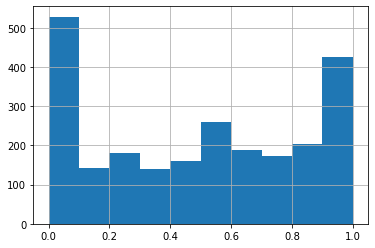

In [242]:
%matplotlib inline
all_sw_info_all['post_ntrial_le_30_perc_frac_segment'].hist()

In [11]:
all_sw_info_all.loc['e13_26m1','e13_26m1_210913'].query('uid==150&field_index==1')[['index_within','switch','post_ntrial_ge_30_perc']]

/tmp/ipykernel_53753/3691306443.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_info_all.loc['e13_26m1','e13_26m1_210913'].query('uid==150&field_index==1')[['index_within','switch','post_ntrial_ge_30_perc']]


,index_within,switch,post_ntrial_ge_30_perc
31,2,1.0,22
94,3,1.0,14
307,10,-1.0,11
431,15,1.0,3
440,13,-1.0,2
563,22,-1.0,0
699,31,-1.0,0


In [12]:
info_key_d_on ={'good_early':{'switch_trial_frac':[0,0.3],'index_within':[2,100],'pre_mean_fr_all_norm':[0,0.2],'post_mean_fr_3_norm':[0.5,1]},
                'good_middle':{'switch_trial_frac':[0.31,0.7],'index_within':[2,100],'pre_mean_fr_all_norm':[0,0.2],'post_mean_fr_3_norm':[0.5,1]},
                'good_late':{'switch_trial_frac':[0.71,1.],'index_within':[2,100],'pre_mean_fr_3_norm':[0,0.2],'post_mean_fr_3_norm':[0.5,1]},
                'bad_already_high':{'index_within':[2,100],'pre_mean_fr_all_norm':[0.4,1.]},
                'bad_transient':{'index_within':[2,100],'post_mean_fr_3_norm':[0,0.3]}
               }

info_key_d_off ={'good_early':{'switch_trial_frac':[0,0.3],'index_within':[2,100],'pre_mean_fr_all_norm':[0.6,1.],'post_mean_fr_3_norm':[0,0.3]},
                'good_middle':{'switch_trial_frac':[0.31,0.7],'index_within':[2,100],'pre_mean_fr_all_norm':[0.6,1.],'post_mean_fr_3_norm':[0,0.3]},
                'good_late':{'switch_trial_frac':[0.71,1.],'index_within':[2,100],'pre_mean_fr_3_norm':[0.6,1.],'post_mean_fr_3_norm':[0,0.3]},
                'bad_already_low':{'index_within':[2,100],'pre_mean_fr_all_norm':[0,0.4]},
                'bad_transient':{'index_within':[2,100],'post_mean_fr_3_norm':[0.5,1]}
               }
info_key_d_all = {
 1:info_key_d_on,
 -1:info_key_d_off   
}


In [253]:
# del(matplotlib)
# del(plt)
import matplotlib
matplotlib.use('agg', force=True)
from matplotlib import pyplot as plt

In [13]:
%%time
reload(sm)
for onoff,info_key_onoff in info_key_d_all.items():
    for quality, info_key_d in info_key_onoff.items():
        
        all_sw_info_all_onoff = all_sw_info_all.loc[all_sw_info_all['switch']==onoff]
        onoffstr_d = {1:'on',-1:'off','both':'both'}
        onoff_str=onoffstr_d[onoff]
        all_sw_info_onoff_sample,all_sw_info_onoff_sub,frac_by_ani = sm.select_fields_using_info(all_sw_info_all_onoff,info_key_d,nsamples=20)

    
        sm.plot_example_ratemaps_and_rates(all_sw_info_onoff_sample,
                                    pf_all_field_combined_all,
                                           fr_map_trial_df_d_all,
                                    trial_index_to_index_within_trialtype_all,
                                    X_raw_all,
                                    X_pwc_all,
                                   quality=quality,onoff_str=onoff_str,
                                    save_dir_root="/mnt/home/szheng/ceph/place_variability/fig/general",task_ind = 0)
        print(onoff_str)
        print(quality)
        print(frac_by_ani)
        print('\n')

/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200823/switch_on_good_early made!
on
good_early
e13_26m1    0.112886
e15_10m1    0.067568
e15_13f1    0.104750
e16_1f1     0.063401
Name: trialtype, dtype: float64


on
good_middle
e13_26m1    0.129925
e15_10m1    0.112613
e15_13f1    0.124239
e16_1f1     0.129683
Name: trialtype, dtype: float64


on
good_late
e13_26m1    0.030884
e15_10m1    0.013514
e15_13f1    0.043849
e16_1f1     0.028818
Name: trialtype, dtype: float64


on
bad_already_high
e13_26m1    0.099042
e15_10m1    0.135135
e15_13f1    0.087698
e16_1f1     0.092219
Name: trialtype, dtype: float64


on
bad_transient
e13_26m1    0.018104
e15_10m1    0.004505
e15_13f1    0.006090
Name: trialtype, dtype: float64


/mnt/home/szheng/ceph/place_variability/fig/general/e16_1f1/e16_1f1_200919/switch_off_good_early made!
off
good_early
e13_26m1    0.077010
e15_10m1    0.057971
e15_13f1    0.069643
e16_1f1     0.069388
Name: trialtype, dtype: float64


/mnt/home/szhe

In [ ]:
# %matplotlib agg
# task_ind = 0
# gpb = all_sw_info_onoff_sample.groupby(level=0)
# for ani,val in gpb:
#     val = val.loc[ani]
#     nplots = val.shape[0]
#     save_dir_full_ani = misc.get_or_create_subdir(save_dir_root,ani)
#     for ii,(sess,row) in enumerate(val.iterrows()):
#         sess = sess[0]
#         save_dir_full_sess = misc.get_or_create_subdir(save_dir_full_ani,sess,f'switch_{onoff_str}_{quality}')
#         fig,axs = plt.subplots(1, 2,figsize=(6*2,1*6),sharey=True,squeeze=True)
#         ax = axs[0]
#         trialtype = row['trialtype']
#         uid = row['uid']
#         field_index = row['field_index']
#         index_within = row['index_within']
#         trial_index = row['trial_index']

#         pf_info=pf_all_field_combined_all.loc[ani,sess,trialtype,uid,field_index]        
#         field_bound = (pf_info['start'],pf_info['end'])
#         if trialtype=='both':
#             trialtype = trial_index_to_index_within_trialtype_all[ani,sess].loc[task_ind].loc[slice(None),trial_index].index[0]
#         data = fr_map_trial_df_d_all[ani,sess].loc[task_ind,trialtype,uid].dropna(axis=1).T           
#         if data.isna().any().any():
#             break
#         fig,ax=ph.ratemap_one_raw(data,trial=index_within,field_bound=field_bound,fig=fig,ax=ax,title=(uid,field_index))
        
#         # plot line
#         ax = axs[1]
#         xx=X_raw_all[ani,sess][task_ind,trialtype].dropna(axis=1).loc[uid,field_index]
#         ax.plot(xx.values,xx.index,marker='o')
#         xx=X_pwc_all[ani,sess][task_ind,trialtype].dropna(axis=1).loc[uid,field_index]
#         ax.plot(xx.values,xx.index)
#         plt.tight_layout()
#         fn_full = os.path.join(save_dir_full_sess,f'uid_{uid}_field_{field_index}_trialtype_{trialtype}_trialwithin_{int(index_within)}.pdf')
#         fig.savefig(fn_full)
# #         plt.close(fig)
        

In [356]:
ma = all_sw_info['pre_mean_fr_all_norm'].between(0,0.2,'both')
all_sw_info.loc[ma].sample()

,trialtype,uid,field_index,time,v,field_pos,trial_index,switch,index_within,switch_trial,...,post_ntrial_le_10_perc_frac_total,post_ntrial_le_30_perc_frac_total,post_ntrial_le_50_perc_frac_total,post_ntrial_le_70_perc_frac_total,post_ntrial_le_90_perc_frac_total,post_ntrial_ge_10_perc_frac_total,post_ntrial_ge_30_perc_frac_total,post_ntrial_ge_50_perc_frac_total,post_ntrial_ge_70_perc_frac_total,post_ntrial_ge_90_perc_frac_total
372,1,125,0,8545.017333,0.078056,1.0,24,1.0,13,13.0,...,0.027027,0.081081,0.162162,0.27027,0.297297,0.324324,0.27027,0.189189,0.081081,0.054054


1
post_ntrial_ge_50_perc_frac_total: 0.00
post_mean_fr_3_norm: 0.80
field_pos=65.0
switch trial=23.0


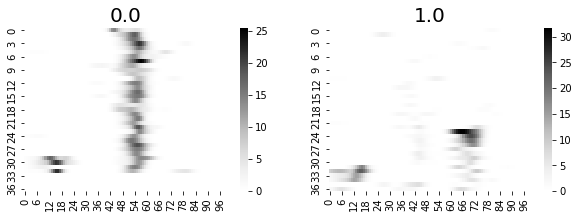

In [396]:
row=all_sw_info.loc[ma].sample().iloc[0]
tt_,uid_,fi_ =row[['trialtype','uid','field_index']]

print(tt_)
post_ntrial_key = 'post_ntrial_ge_50_perc_frac_total'
post_fr_key = 'post_mean_fr_3_norm'
print(f'{post_ntrial_key}: {row[post_ntrial_key]:.02f}')
print(f'{post_fr_key}: {row[post_fr_key]:.02f}')
print(f'field_pos={row["field_pos"]}')
print(f'switch trial={row["switch_trial"]}')
fig,axs = plt.subplots(1,2,figsize=(10,3))
for ii,tt in enumerate(tt_l):
    data=fr_map_trial_df_d.loc[task_ind,tt,uid_].T
    ax = axs[ii]
    sns.heatmap(data,ax=ax,cmap='Greys')
    ax.set_title(tt)
    
    